### BU Sustainability: How weather impacts Waste
#### Answer a series of questions through data analysis to help BU sustainability implement the Zero Waste plan: 
1. Does temperature impact waste generation? 
2. If so, in what ways (i.e. more recycling, more of all materials, less recycling, etc.). 
3. Can we use temperature as a predictor of waste generation and service level requirements? 

### Preliminary Data Analysis
- Understand and explore data/distribution of various datasets provided
- Work towards answering the main questions of the project

In [1]:
#Imports
import numpy as np
import pandas as pd
import random, glob, time
import matplotlib.pyplot as plt

DATA_PATH = 'data/'

In [2]:
csv_files = glob.glob(DATA_PATH+"*.csv")
csv_files

['data/readings_device.39671_from.2022-07-01_to.2022-10-02.csv',
 'data/Hauler_Response_Pick-Up_2023-01-04_1018.csv',
 'data/readings_device.39686_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39686_from.2021-07-16_to.2021-10-02.csv',
 'data/readings_device.24668_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39671_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39667_from.2021-07-01_to.2021-10-02.csv',
 'data/readings_device.39686_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39874_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39691_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39667_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39874_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39569_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39689_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.24572_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39665_from.202

In [3]:
xl_files = glob.glob(DATA_PATH+"*.xl*")
xl_files

['data/Sites_Report.xlsx',
 'data/File Overview.xlsx',
 'data/BU Daily Weights FY22.xlsx']

In [4]:
'data/Alert_Flag_History_2023-01-04_1029.csv'
'data/PSI_Readings_with_Weather_2023-01-04_1026.csv'
'data/Hauler_Response_Pick-Up_2023-01-04_1018.csv'
'data/BU Daily Weights FY22.xlsx'

'data/BU Daily Weights FY22.xlsx'

In [5]:
reading_df = pd.read_csv(csv_files[3])
reading_df

,readingDtUtz,valuePsi,celsius,fahrenheit
0,2021-08-27T12:56:43,744,23.41,74.138
1,2021-08-27T12:57:14,672,23.41,74.138
2,2021-08-27T13:00:13,664,23.41,74.138
3,2021-08-27T13:00:44,632,23.41,74.138
4,2021-08-27T13:04:31,664,23.41,74.138
...,...,...,...,...
1735,2021-10-01T20:24:58,464,15.86,60.548
1736,2021-10-01T21:22:01,504,15.86,60.548
1737,2021-10-01T21:22:31,448,15.86,60.548
1738,2021-10-01T21:32:35,552,15.86,60.548


In [6]:
## Hauler response
hauler_df = pd.read_csv('data/Hauler_Response_Pick-Up_2023-01-04_1018.csv')
hauler_df

,Account,Site,Device,Serial No.,Last PSI,Last Full Date,Last Empty Date,Hours Between Full and Empty to Hauler Response Pick Up,Last Success,Pickup Date,Created Date,Reference,Clicked,Notes
0,Boston University,BU #2 Student Village,BU #2 Student Village 35 Yd,31178,357,NaN,NaN,--,2023-01-04T05:43:08,NaN,2022-12-22T23:39:42,NaN,0,NaN
1,Boston University,BU Med 700,BU Med 700 Albany 20 Yd,31185,512,NaN,NaN,--,2023-01-04T05:44:38,NaN,2022-12-22T14:39:53,NaN,0,NaN
2,Boston University,BU #35 22 Babbit,BU #35 22 Babbit 35 Yd,31183,338,NaN,NaN,--,2023-01-04T05:44:28,NaN,2022-12-22T13:00:31,NaN,0,NaN
3,Boston University,BU #43 West Loading Dock,BU #43 West Loading Dock,31173,456,NaN,NaN,--,2023-01-04T05:35:19,NaN,2022-12-19T17:19:16,NaN,0,NaN
4,Boston University,BU #90 - School of Law,BU #90 - School of Law 35,31167,434,NaN,NaN,--,2023-01-04T05:32:56,NaN,2022-12-19T09:15:58,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Boston University,BU #82 Warren Towers 35,BU #82 Warren Towers 35 Yd,31180,253,NaN,NaN,--,2023-01-04T05:25:18,NaN,2021-09-17T22:17:49,NaN,0,NaN
382,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,1132,NaN,NaN,--,2023-01-04T05:24:56,NaN,2021-09-02T16:57:48,NaN,0,NaN
383,Boston University,BU #18 - Warren Hall,BU #18 - Warren Hall 20 Yd,30946,964,NaN,NaN,--,2023-01-04T05:05:42,NaN,2021-09-02T14:45:41,NaN,0,NaN
384,Boston University,BU #102 Student Health Services,BU #102 Student Health Services 35 Yd,31203,1132,NaN,NaN,--,2023-01-04T05:24:56,NaN,2021-08-31T23:00:20,NaN,0,NaN


In [7]:
## Events to get device #
events_df = pd.read_csv('data/Events_2023-01-04_1022.csv', low_memory=False)
events_df

,Account,Site,Device,Serial No.,Last PSI,Last Full Date,Last Empty Date,Events,Event Date,Reference Number,Event Data,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Boston University,BU #4 Yawkey,BU #4 Yawkey Center 15 Yd,31182,469,2022-09-06T04:42:43,2022-09-07T16:21:55,Device Responded,2023-01-04T05:46:24,2.301040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Boston University,BU Med 700,BU Med 700 Albany 20 Yd,31185,512,2022-12-22T09:39:32,2022-12-23T11:35:59,Device Responded,2023-01-04T05:44:37,2.301040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Boston University,BU #4 Yawkey,BU #4 Yawkey Center Org 15 Yd,30845,433,2021-02-04T13:06:23,2021-02-04T13:16:10,Device Responded,2023-01-04T05:44:31,2.301040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Boston University,BU #35 22 Babbit,BU #35 22 Babbit 35 Yd,31183,338,2022-12-22T07:59:08,2022-12-25T08:12:43,Device Responded,2023-01-04T05:44:28,2.301040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Boston University,BU #2 Student Village,BU #2 Student Village 35 Yd,31178,357,2022-12-22T18:38:17,2022-12-29T07:28:03,Device Responded,2023-01-04T05:43:07,2.301040e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59705,Boston University,BU 685 Comm Ave,BU 685 Comm Ave,31164,652,2022-12-12T20:33:09,2022-12-15T11:37:40,Device Comm Error,2021-07-15T10:56:59,2.107150e+11,"{exceptionDesc"":""connection timed out""}""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59706,Boston University,BU #87 College of Engineering,BU #87 College of Engineering 20 Yd,31168,619,2022-12-10T15:14:25,2022-12-13T12:08:13,Device Config Requested,2021-07-15T10:45:46,2.107150e+11,"{eventId"":""1c2c8330-1dfa-45ce-9160-78a7b088f1be""",fullControl:true,"operation:""setupRequest""",deviceId:39689,"url:""ip://10.64.38.210:56255""","serialNo:""31168""}""",NaN,NaN,NaN,NaN
59707,Boston University,BU #90 - School of Law,BU #90 - School of Law 35,31167,434,2022-12-19T04:15:33,2022-12-20T22:31:12,Device Config Requested,2021-07-15T10:42:03,2.107150e+11,"{eventId"":""337ed595-8a1f-4a18-97d3-d48ba4a13d25""",fullControl:true,"operation:""setupRequest""",deviceId:39688,"url:""ip://10.64.38.238:56255""","serialNo:""31167""}""",NaN,NaN,NaN,NaN
59708,Boston University,BU #93 George Sherman Union,BU #93 George Sherman Union 35 Yd,31165,1028,2022-12-08T13:03:14,2022-12-12T14:25:42,Device Config Requested,2021-07-15T10:36:44,2.107150e+11,"{eventId"":""eae5f587-cb4c-4968-a0df-4d0e7f36a1f9""",fullControl:true,"operation:""setupRequest""",deviceId:39686,"url:""ip://10.64.38.209:56255""","serialNo:""31165""}""",NaN,NaN,NaN,NaN


In [8]:
events_df.columns

Index(['Account', 'Site', 'Device', 'Serial No.', 'Last PSI', 'Last Full Date',
       'Last Empty Date', 'Events', 'Event Date', 'Reference Number',
       'Event Data', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [9]:
#Create a mapping from DeviceID -> SerialNo
device_serial_id_mapping = {}

for i, row in events_df.iterrows():
    if pd.notna(row['Unnamed: 13']):
        if "deviceId" in row['Unnamed: 13']:
            deviceID = row['Unnamed: 13'][9:]
            serialNo = row['Serial No.']
            device_serial_id_mapping[int(deviceID)] = serialNo

In [10]:
device_serial_id_mapping

{39599: 31200,
 39689: 31168,
 39666: 31175,
 39691: 31171,
 39673: 31182,
 39671: 31180,
 39674: 31173,
 39688: 31167,
 39668: 31177,
 39569: 31203,
 39880: 31186,
 39874: 31185,
 39693: 31170,
 23565: 31337,
 39667: 31176,
 39878: 31183,
 24668: 30932,
 39873: 31191,
 39600: 31201,
 39665: 31174,
 39692: 31172,
 39686: 31165,
 39685: 31164,
 39669: 31178}

In [11]:
#Create a mapping from serialNo -> SiteName
serial_siteName_mapping = {}

for i, row in events_df.iterrows():
    serial_siteName_mapping[row['Serial No.']] = row['Site']

serial_siteName_mapping

{31182: 'BU #4 Yawkey',
 31185: 'BU Med 700',
 30845: 'BU #4 Yawkey',
 31183: 'BU #35 22 Babbit',
 31178: 'BU #2 Student Village',
 31191: 'BU #93 George Sherman Union',
 31165: 'BU #93 George Sherman Union',
 31186: 'BU #69 - Graduate Apartments',
 30932: 'BU #48 Student Village #2',
 31172: 'BU MED - 15 Stoughton',
 30935: 'BU Fenway',
 31173: 'BU #43 West Loading Dock',
 31167: 'BU #90 - School of Law',
 31200: 'BU #46 30 Bay State',
 31180: 'BU #82 Warren Towers 35',
 31164: 'BU 685 Comm Ave',
 31170: 'BU 140 Bay State Rd',
 31203: 'BU #102 Student Health Services',
 31176: 'BU #72 Rafik B Hariri',
 31337: 'Boston University - 120 ASHFORD',
 30851: 'BU #108 Agganis Arena',
 31201: 'BU #38 Life Sciences',
 31171: 'BU Med #815 Albany',
 30946: 'BU #18 - Warren Hall',
 31175: 'BU Fenway',
 31168: 'BU #87 College of Engineering',
 31174: 'BU #96 808 Commonwealth',
 31177: 'BU #105 Kilachand Hall'}

### Append all device readings into a single df

In [12]:
device_reading_files = glob.glob(DATA_PATH+"/readings*")
print(len(device_reading_files))
device_reading_files

117


['data/readings_device.39671_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39686_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39686_from.2021-07-16_to.2021-10-02.csv',
 'data/readings_device.24668_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39671_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39667_from.2021-07-01_to.2021-10-02.csv',
 'data/readings_device.39686_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39874_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39691_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39667_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39874_from.2022-07-01_to.2022-10-02.csv',
 'data/readings_device.39569_from.2021-10-01_to.2022-01-02.csv',
 'data/readings_device.39689_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.24572_from.2022-04-01_to.2022-07-02.csv',
 'data/readings_device.39665_from.2022-01-01_to.2022-04-02.csv',
 'data/readings_device.39

In [13]:
#Loop over each file and append and sort
for i, dev_filename in enumerate(device_reading_files):
    if i==0:
        device_df = pd.read_csv(dev_filename)
        device_df['device_id'] = int(dev_filename[21:26])
        device_df['serial_no'] = int(device_serial_id_mapping[int(dev_filename[21:26])])
    else:
        new_device = pd.read_csv(dev_filename)
        new_device['device_id'] = dev_filename[21:26]
        try:
            new_device['serial_no'] = int(device_serial_id_mapping[int(dev_filename[21:26])])
            device_df = pd.concat([device_df, new_device])
        except:
            print("Device ID {} doesn't have a serial number".format(dev_filename[21:26]))
        
#Convert timestamp to timestamp dtype
device_df.rename(columns={"readingDtUtz": "timestamp"}, inplace=True)
device_df.timestamp = pd.to_datetime(device_df.timestamp)

#Create Date column
device_df['date'] = pd.to_datetime(device_df.timestamp.dt.date)

device_df.sort_values(by=["device_id", "timestamp"], inplace=True)
device_df.reset_index(inplace=True, drop=True)

print(device_df.shape, device_df.columns)

Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24572 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
Device ID 24363 doesn't have a serial number
Device ID 24990 doesn't have a serial number
(146912, 7) Index(['timestamp', 'valuePsi', 'celsius', 'fahrenheit', 'device_id',
       'serial_no', 'date'],
      dtype='object')


In [14]:
device_df.device_id.unique()

array([39671, '24668', '39569', '39599', '39600', '39665', '39667',
       '39668', '39669', '39671', '39673', '39674', '39685', '39686',
       '39688', '39689', '39691', '39692', '39693', '39874', '39878',
       '39880'], dtype=object)

In [15]:
device_df.head(10)

,timestamp,valuePsi,celsius,fahrenheit,device_id,serial_no,date
0,2022-07-01 04:35:52,256,20.20,68.360,39671,31180,2022-07-01
1,2022-07-01 04:36:39,200,20.20,68.360,39671,31180,2022-07-01
2,2022-07-01 04:37:11,240,20.20,68.360,39671,31180,2022-07-01
3,2022-07-01 06:42:44,200,20.20,68.360,39671,31180,2022-07-01
4,2022-07-01 08:04:31,280,22.52,72.536,39671,31180,2022-07-01
5,2022-07-01 08:04:43,184,22.52,72.536,39671,31180,2022-07-01
6,2022-07-01 08:05:52,264,22.52,72.536,39671,31180,2022-07-01
7,2022-07-01 08:07:44,280,22.52,72.536,39671,31180,2022-07-01
8,2022-07-01 09:18:06,240,22.52,72.536,39671,31180,2022-07-01
9,2022-07-01 09:41:46,264,22.52,72.536,39671,31180,2022-07-01


In [16]:
pd.to_datetime(device_df.timestamp[0])

Timestamp('2022-07-01 04:35:52')

In [17]:
device_df.date.min()

Timestamp('2021-07-19 00:00:00')

In [18]:
device_df.date.max()

Timestamp('2022-10-01 00:00:00')

In [19]:
### Group data by date and device ID to get mean temp/PSI data
all_devices_mean_df = device_df.groupby(['device_id','serial_no','date']).mean().reset_index()

In [20]:
## Create column using the site name mapping
all_devices_mean_df['site_name'] = all_devices_mean_df.serial_no.apply(lambda row: 
                                                             serial_siteName_mapping[row])
all_devices_mean_df

,device_id,serial_no,date,valuePsi,celsius,fahrenheit,site_name
0,39671,31180,2022-07-01,253.333333,24.822500,76.680500,BU #82 Warren Towers 35
1,39671,31180,2022-07-02,331.200000,28.178000,82.720400,BU #82 Warren Towers 35
2,39671,31180,2022-07-03,280.400000,26.006000,78.810800,BU #82 Warren Towers 35
3,39671,31180,2022-07-04,279.272727,24.530909,76.155636,BU #82 Warren Towers 35
4,39671,31180,2022-07-05,182.800000,22.599000,72.678200,BU #82 Warren Towers 35
...,...,...,...,...,...,...,...
7161,39880,31186,2022-09-27,502.000000,19.840000,67.712000,BU #69 - Graduate Apartments
7162,39880,31186,2022-09-28,525.333333,17.156667,62.882000,BU #69 - Graduate Apartments
7163,39880,31186,2022-09-29,552.000000,15.150000,59.270000,BU #69 - Graduate Apartments
7164,39880,31186,2022-09-30,590.000000,12.020000,53.636000,BU #69 - Graduate Apartments


In [21]:
all_devices_mean_df.groupby(['site_name'])['date'].agg(['min', 'max'])

,min,max
site_name,,
BU #102 Student Health Services,2021-08-25,2022-10-01
BU #105 Kilachand Hall,2021-08-18,2022-05-25
BU #2 Student Village,2021-09-03,2022-10-01
BU #35 22 Babbit,2021-08-30,2022-10-01
BU #38 Life Sciences,2021-08-30,2022-10-01
BU #4 Yawkey,2021-09-10,2022-10-01
BU #43 West Loading Dock,2021-08-24,2022-10-01
BU #46 30 Bay State,2021-08-25,2022-10-01
BU #48 Student Village #2,2021-10-01,2022-10-01


In [22]:
all_devices_mean_df.site_name.value_counts()

BU #35 22 Babbit                   396
BU #82 Warren Towers 35            394
BU #2 Student Village              392
BU #90 - School of Law             388
BU #87 College of Engineering      385
BU #46 30 Bay State                382
BU MED - 15 Stoughton              379
BU #43 West Loading Dock           377
BU #38 Life Sciences               377
BU #72 Rafik B Hariri              372
BU #48 Student Village #2          361
BU 140 Bay State Rd                360
BU #4 Yawkey                       359
BU 685 Comm Ave                    356
BU #93 George Sherman Union        336
BU #96 808 Commonwealth            335
BU Med 700                         279
BU #69 - Graduate Apartments       270
BU #105 Kilachand Hall             240
BU #102 Student Health Services    236
BU Med #815 Albany                 192
Name: site_name, dtype: int64

In [23]:
#Map the site names to a site key for future joins
#Function to map site name to site key
def extractSiteKey(raw_name):
    terms = str(raw_name).lower().split(' ')
    if len(terms) < 2:
        return 'NA'
    
    if "#" in terms[1]:
        site_key = terms[0]+terms[1]
    
    elif 'med' in terms[1]:
        site_key = terms[0]+terms[1]+terms[2]
    
    else:
        site_key = terms[0]+terms[1]
    
    return site_key

In [24]:
## Create column using the site name mapping
all_devices_mean_df['site_key'] = all_devices_mean_df.site_name.apply(lambda row: extractSiteKey(row))

#Replace edge cases manually to match other file
all_devices_mean_df.site_key.replace(to_replace={'bumed-':'bumed#15','bu140':'bu#15',
                                                 'bu685':'bu#685', 'bumed700':'bumed#700'}, inplace=True)

In [25]:
print(len(all_devices_mean_df.site_key.unique()))
sorted(all_devices_mean_df.site_key.unique())

21


['bu#102',
 'bu#105',
 'bu#15',
 'bu#2',
 'bu#35',
 'bu#38',
 'bu#4',
 'bu#43',
 'bu#46',
 'bu#48',
 'bu#685',
 'bu#69',
 'bu#72',
 'bu#82',
 'bu#87',
 'bu#90',
 'bu#93',
 'bu#96',
 'bumed#15',
 'bumed#700',
 'bumed#815']

### Join daily weight data using Site and Date

In [26]:
#Join daily weight data
#NOTE: Location name should match the 
daily_weights_df = pd.read_excel('data/BU Daily Weights FY22.xlsx')
daily_weights_df

,Customer Key,Location,Address,Work Order Date,Material,Tons
0,31582.0,200 Riverway,200 Riverway,2022-06-27,Trash,1.88
1,31582.0,200 Riverway,200 Riverway,2022-06-09,Trash,2.13
2,31582.0,200 Riverway,200 Riverway,2022-05-24,Trash,2.60
3,31582.0,200 Riverway,200 Riverway,2022-05-14,Trash,2.95
4,31582.0,200 Riverway,200 Riverway,2022-05-07,Trash,2.99
...,...,...,...,...,...,...
18169,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-10,Compost,5.52
18170,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-09-02,Compost,2.78
18171,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-08-26,Compost,1.90
18172,31771.0,BU #4 - Yawkey Center,100 BAY STATE RD,2021-07-27,Compost,0.93


In [27]:
#Generate site key
daily_weights_df['site_key'] = daily_weights_df.Location.apply(lambda row: extractSiteKey(row))

#Fix some manually
daily_weights_df.site_key.replace(to_replace={'bumed-15':'bumed#15', 'bumed-815':'bumed#815',
                                                 'bu685':'bu#685', 'bumed-700':'bumed#700'}, inplace=True)

In [28]:
matchDict = {}
for s_key in daily_weights_df.site_key.values:
    if s_key in all_devices_mean_df.site_key.values:
        if matchDict.get(s_key) is None:
            matchDict[s_key] = 1
        else:
            matchDict[s_key] += 1

In [29]:
#685 Comm Ave missing 
print(len(matchDict))
matchDict

20


{'bu#2': 398,
 'bu#4': 433,
 'bu#15': 100,
 'bu#35': 143,
 'bu#38': 108,
 'bu#43': 237,
 'bu#46': 108,
 'bu#48': 209,
 'bu#69': 102,
 'bu#72': 220,
 'bu#82': 297,
 'bu#87': 90,
 'bu#90': 138,
 'bu#93': 244,
 'bu#96': 208,
 'bu#102': 110,
 'bu#105': 103,
 'bumed#15': 252,
 'bumed#700': 195,
 'bumed#815': 321}

In [30]:
daily_weights_df.rename(columns={"Work Order Date": "date", "Location":"Site"}, inplace=True)
daily_weights_df.drop(columns = ["Address", 'Site', 'Customer Key'], inplace = True)

In [31]:
daily_weights_df.date.dtype

dtype('<M8[ns]')

In [32]:
daily_weights_df.columns

Index(['date', 'Material', 'Tons', 'site_key'], dtype='object')

In [33]:
daily_weights_df.isna().sum()

date        21
Material     0
Tons         0
site_key     0
dtype: int64

### Perform SQL inner join to avoid Nans

In [34]:
device_readings_weights_df = pd.merge(all_devices_mean_df, daily_weights_df, how = 'inner',
                                      on=['date', 'site_key'])

In [35]:
device_readings_weights_df

,device_id,serial_no,date,valuePsi,celsius,fahrenheit,site_name,site_key,Material,Tons
0,24668,30932,2021-10-01,394.000000,15.765000,60.377000,BU #48 Student Village #2,bu#48,Recycling,0.0565
1,24668,30932,2021-10-02,431.636364,15.744545,60.340182,BU #48 Student Village #2,bu#48,Recycling,0.2830
2,24668,30932,2021-10-04,576.666667,14.909167,58.836500,BU #48 Student Village #2,bu#48,Recycling,0.0920
3,24668,30932,2021-10-05,726.000000,14.385000,57.893000,BU #48 Student Village #2,bu#48,Recycling,0.0920
4,24668,30932,2021-10-07,866.222222,18.500000,65.300000,BU #48 Student Village #2,bu#48,Recycling,0.0920
...,...,...,...,...,...,...,...,...,...,...
3211,39880,31186,2022-06-07,492.000000,21.960000,71.528000,BU #69 - Graduate Apartments,bu#69,Recycling,0.0250
3212,39880,31186,2022-06-10,684.000000,23.440000,74.192000,BU #69 - Graduate Apartments,bu#69,Recycling,0.0250
3213,39880,31186,2022-06-14,796.000000,26.220000,79.196000,BU #69 - Graduate Apartments,bu#69,Recycling,0.0300
3214,39880,31186,2022-06-16,438.000000,19.980000,67.964000,BU #69 - Graduate Apartments,bu#69,Trash,3.9700


In [36]:
device_readings_weights_df.site_name.value_counts()

BU #4 Yawkey                       393
BU #2 Student Village              325
BU #82 Warren Towers 35            251
BU MED - 15 Stoughton              237
BU #93 George Sherman Union        195
BU #43 West Loading Dock           190
BU #48 Student Village #2          180
BU #72 Rafik B Hariri              180
BU #96 808 Commonwealth            171
BU Med 700                         153
BU #35 22 Babbit                   132
BU #90 - School of Law             118
BU Med #815 Albany                 107
BU #46 30 Bay State                101
BU #38 Life Sciences                98
BU #87 College of Engineering       86
BU 140 Bay State Rd                 81
BU #102 Student Health Services     75
BU #105 Kilachand Hall              72
BU #69 - Graduate Apartments        71
Name: site_name, dtype: int64

In [37]:
device_readings_weights_df.groupby(['site_name'])['date'].agg(['min', 'max']).reset_index()

,site_name,min,max
0,BU #102 Student Health Services,2021-09-02,2022-06-16
1,BU #105 Kilachand Hall,2021-08-24,2022-05-24
2,BU #2 Student Village,2021-09-03,2022-06-30
3,BU #35 22 Babbit,2021-08-31,2022-06-30
4,BU #38 Life Sciences,2021-08-31,2022-06-28
5,BU #4 Yawkey,2021-09-10,2022-06-30
6,BU #43 West Loading Dock,2021-08-24,2022-06-30
7,BU #46 30 Bay State,2021-08-31,2022-06-30
8,BU #48 Student Village #2,2021-10-01,2022-06-30
9,BU #69 - Graduate Apartments,2021-08-31,2022-06-24


In [38]:
device_readings_weights_df.groupby(['site_name'])[['valuePsi','fahrenheit',
                                                   'Tons']].agg(['min', 'max', 'mean']).reset_index()

site_name    valuePsi                           \
                                            min          max        mean   
0   BU #102 Student Health Services  104.000000  1426.000000  841.616024   
1            BU #105 Kilachand Hall  116.526316  1653.090909  724.374263   
2             BU #2 Student Village  236.790123  1603.487179  670.722943   
3                  BU #35 22 Babbit  268.800000  1696.000000  765.475989   
4              BU #38 Life Sciences  122.000000  1258.250000  352.112528   
5                      BU #4 Yawkey  176.148148  1919.272727  976.784575   
6          BU #43 West Loading Dock  136.000000  1814.105263  722.269792   
7               BU #46 30 Bay State  136.774194  1778.000000  743.353514   
8         BU #48 Student Village #2  348.148148  2010.352941  758.802560   
9      BU #69 - Graduate Apartments  170.232558  1532.000000  693.402760   
10            BU #72 Rafik B Hariri  451.862069  1804.190476  821.651695   
11          BU #82 Warren Towers 35  184.800000  1809.760000  412.668776   
12    BU #87 College of Engineering  211.157895  1537.925926  700.894387   
13           BU #90 - School of Law  206.222222  1511.111111  681.427340   
14      BU #93 George Sherman Union  477.114754  1914.264151  830.303183   
15          BU #96 808 Commonwealth  144.000000  1352.000000  659.919498   
16              BU 140 Bay State Rd  136.000000  1707.000000  568.980961   
17            BU MED - 15 Stoughton  312.000000   902.080000  504.462753   
18               BU Med #815 Albany  184.000000  1648.000000  899.545878   
19                       BU Med 700  176.000000  1781.333333  643.867181   

   fahrenheit                         Tons                   
          min        max       mean    min    max      mean  
0    9.118400  83.552000  50.570971  0.000   6.65  0.335593  
1   -3.244000  80.834000  45.683797  0.000   3.96  0.463743  
2   -7.754286  82.346000  46.438153  0.000   8.69  0.475171  
3   -6.259000  77.747000  47.835129  0.000  11.35  0.717042  
4    7.794000  78.842750  48.171053  0.000   3.31  0.427209  
5   -0.652000  82.310000  48.295409  0.000   6.96  0.753375  
6   -4.274500  90.782857  47.461019  0.000  10.34  1.349195  
7    6.167000  81.154400  50.808162  0.000   5.44  0.778881  
8    4.532000  83.174000  48.838878  0.010   5.56  0.706328  
9   10.400000  79.196000  48.701738  0.000   3.97  0.650254  
10  -0.886000  85.118000  48.367340  0.000   5.74  0.579414  
11  -3.616667  80.406154  48.299375  0.022   9.89  1.143508  
12   6.303200  83.078667  48.259705  0.000   7.54  0.796116  
13   6.361455  94.328857  47.688386  0.000   8.12  0.594823  
14  15.300675  84.585826  53.435893  0.000  19.37  1.310505  
15   0.406400  87.584000  47.573531  0.000   6.52  0.221003  
16   0.162500  83.066000  46.847935  0.005  10.03  0.893074  
17 -12.046000  84.047000  46.871033  0.000   4.70  0.769492  
18  -6.340000  77.783000  45.180144  0.000   4.45  0.252029  
19   5.630000  79.441000  47.376290  0.000   4.78  0.364797

### Investigate Recyling vs. Trash vs. Compost

Text(0.5, 1.0, 'Mean Daily Weight by Waste Type')

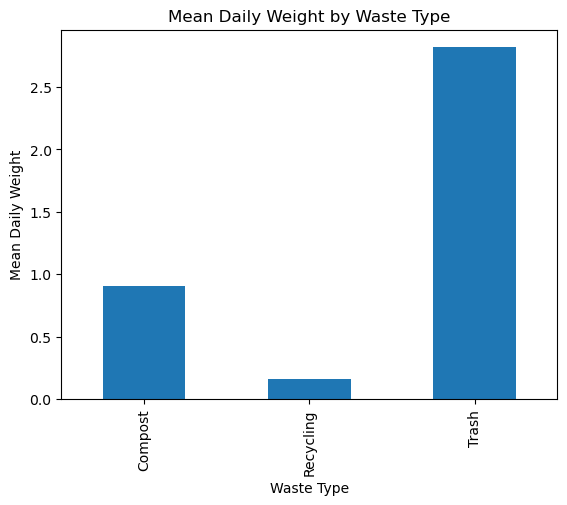

In [39]:
device_readings_weights_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type")

Text(0.5, 1.0, 'Mean Daily Weight by Waste Type at Warren Towers')

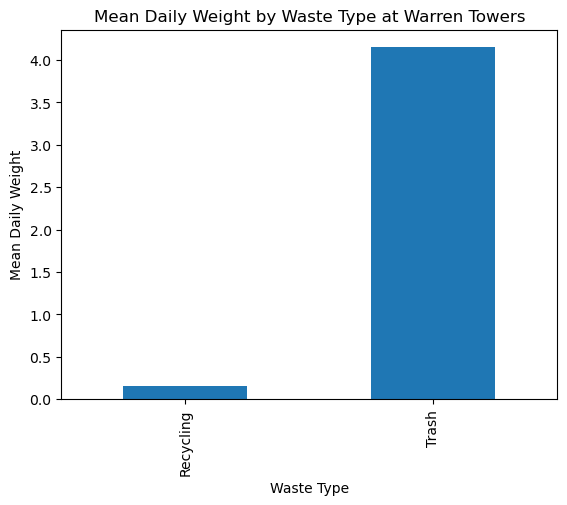

In [40]:
warren_towers_df = device_readings_weights_df[device_readings_weights_df['site_name'] == 'BU #82 Warren Towers 35']
warren_towers_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type at Warren Towers")

### Timeline plots by waste type for each site

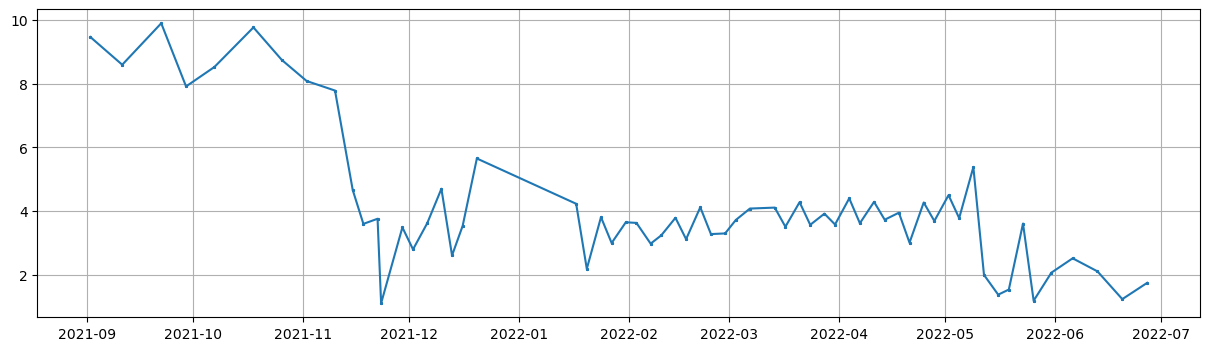

In [41]:
warren_towers_trash = warren_towers_df[warren_towers_df.Material == 'Trash']
fig = plt.figure(figsize=(15,4))
plt.plot(warren_towers_trash.date, warren_towers_trash.Tons, '*-', ms=2)
plt.grid()

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.019764  0.005693
fahrenheit -0.019764    1.000000  0.161609
valuePsi    0.005693    0.161609  1.000000


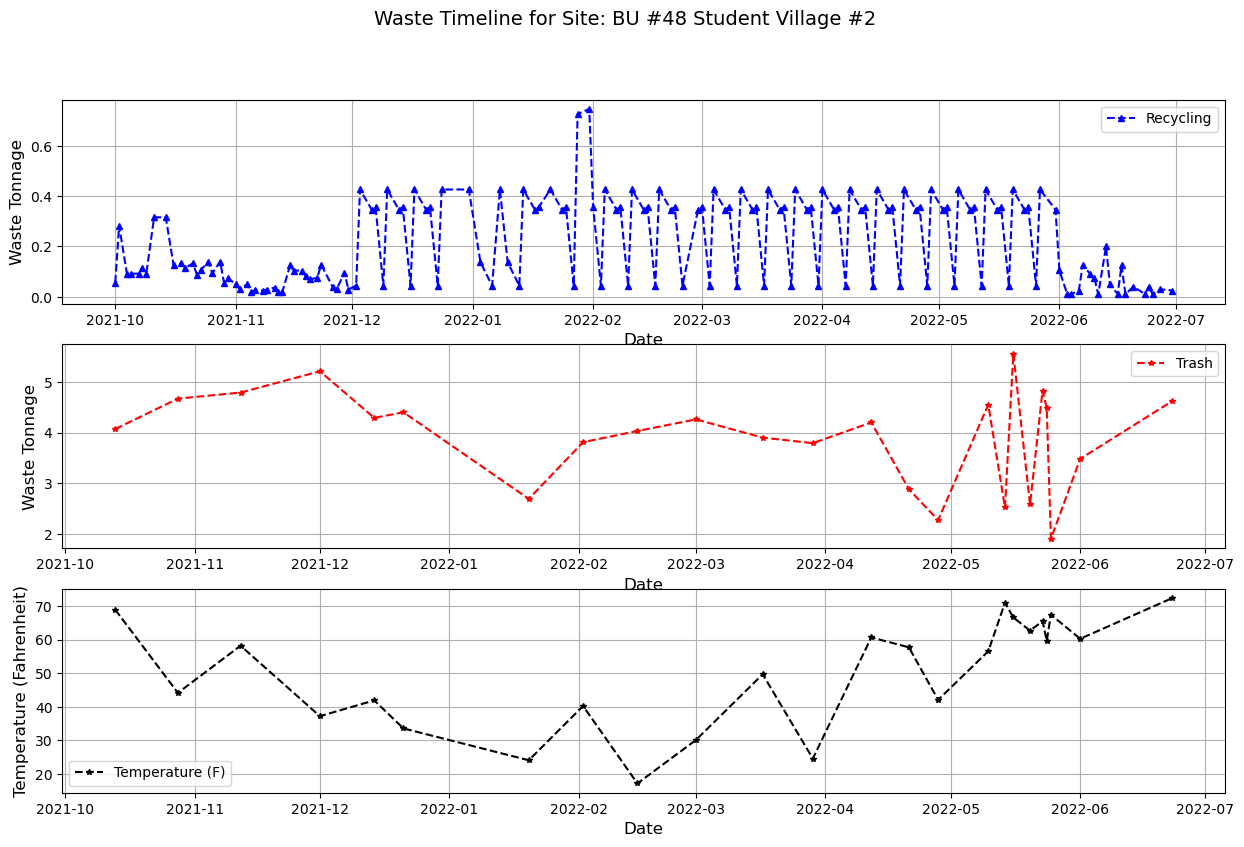

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.261919 -0.216936
fahrenheit  0.261919    1.000000 -0.189349
valuePsi   -0.216936   -0.189349  1.000000


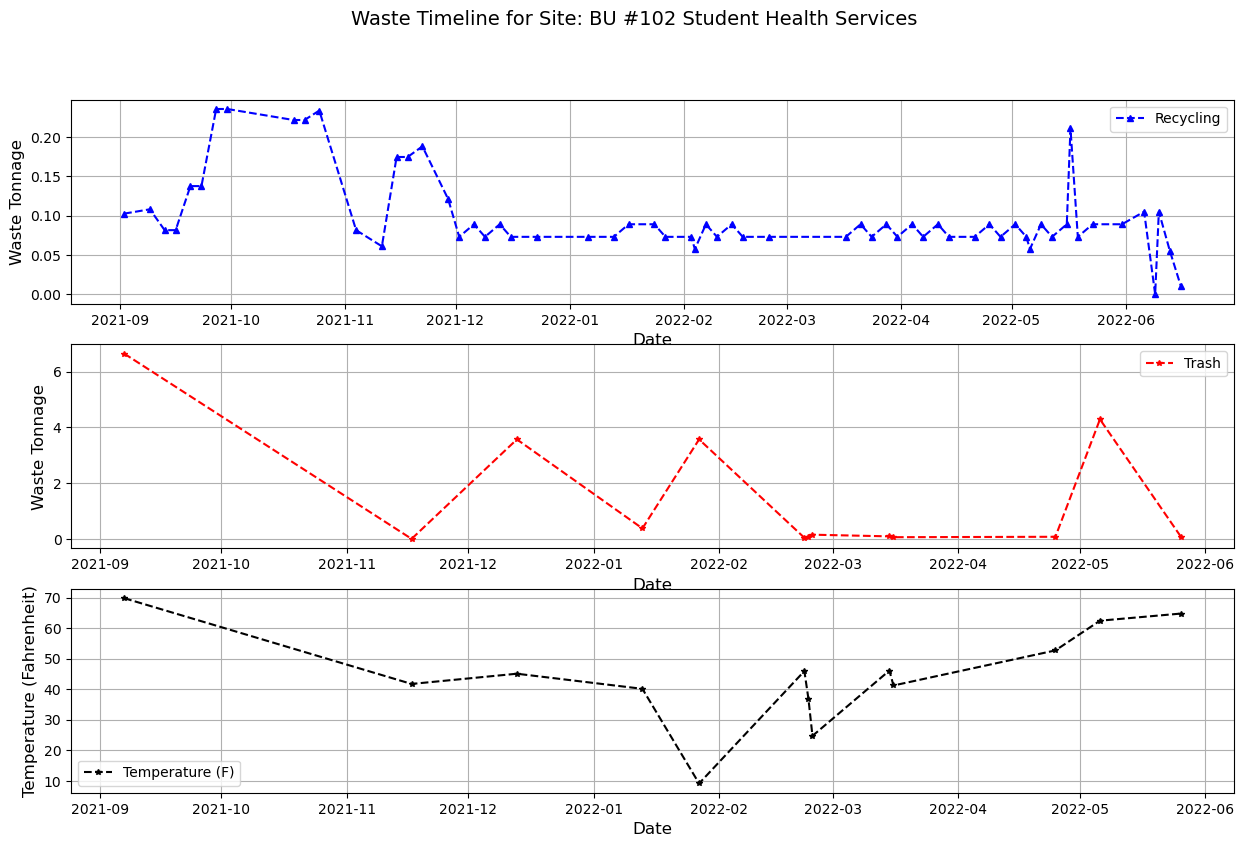

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.408127  0.509585
fahrenheit  0.408127    1.000000  0.102595
valuePsi    0.509585    0.102595  1.000000


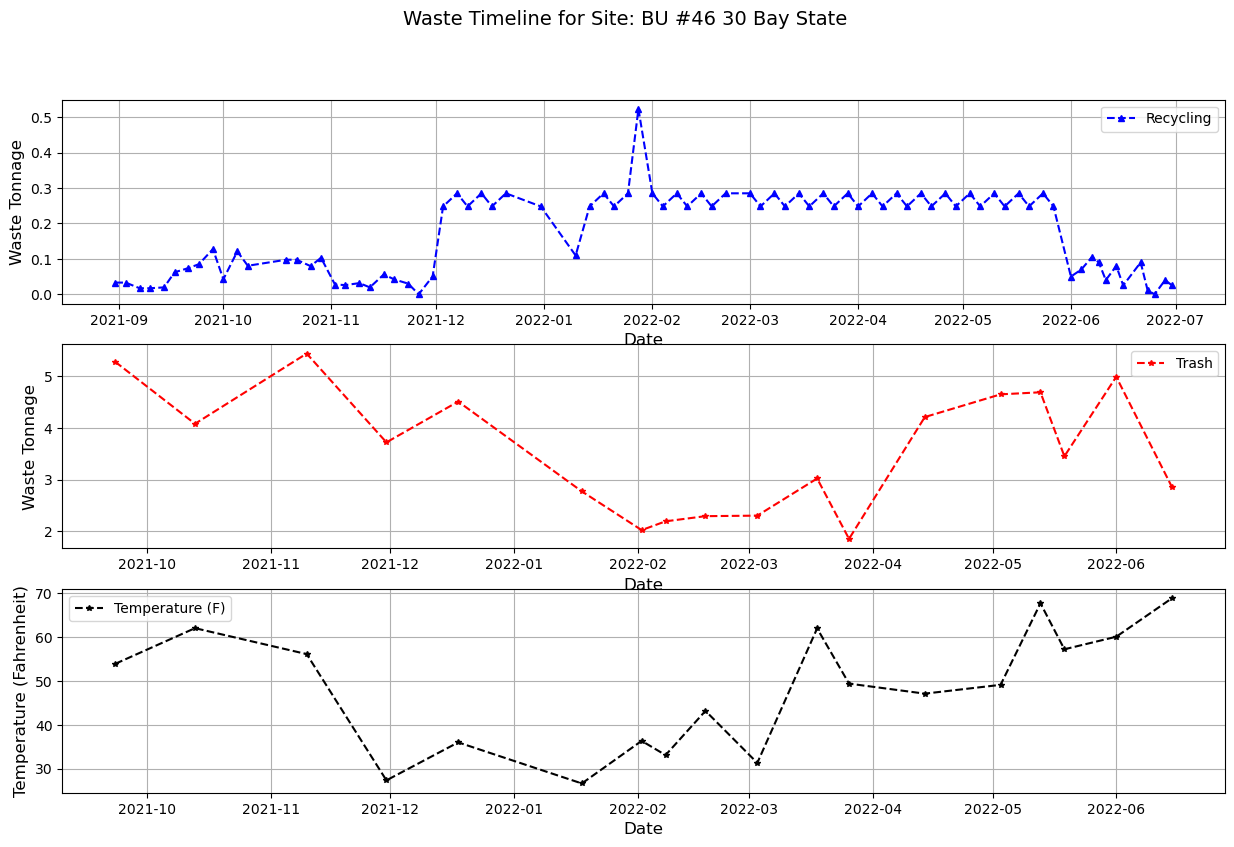

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.393738  0.622664
fahrenheit  0.393738    1.000000  0.048617
valuePsi    0.622664    0.048617  1.000000


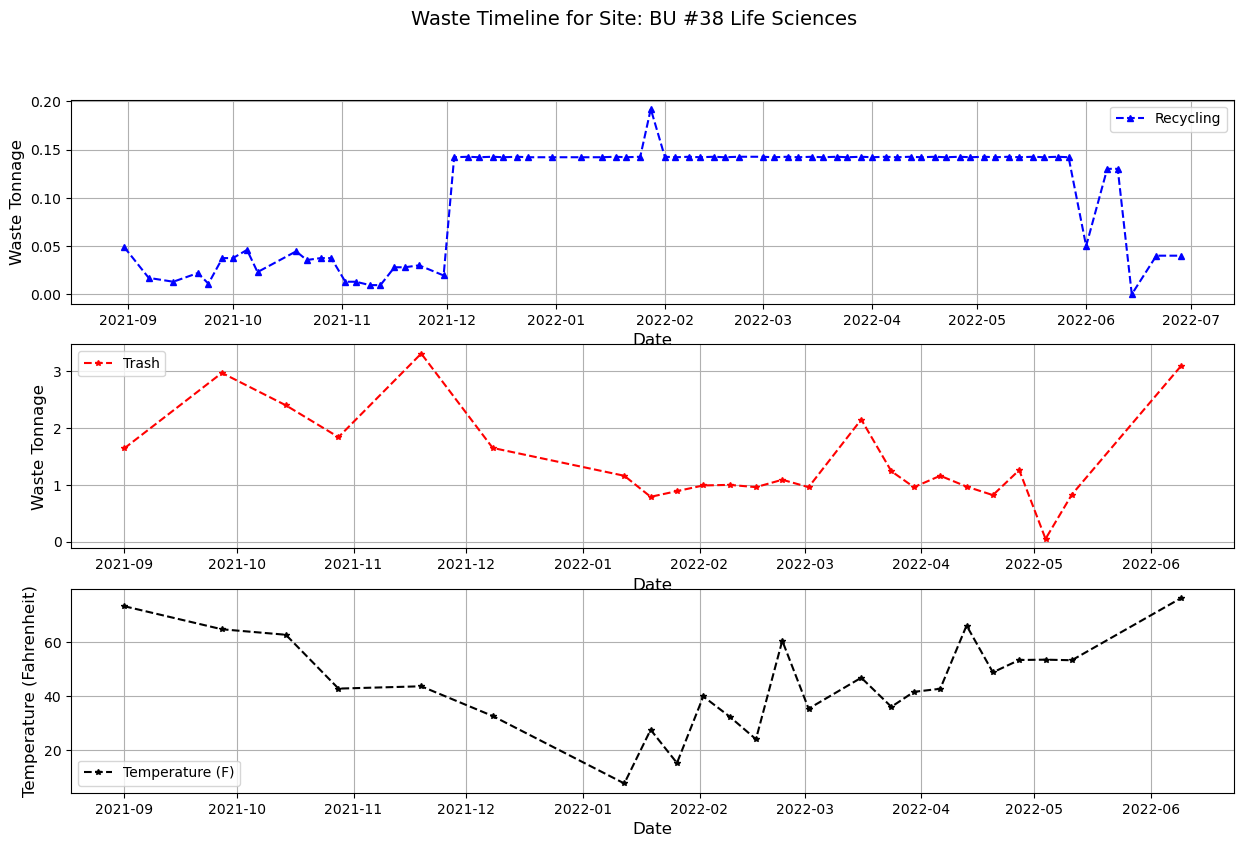

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.438657 -0.293626
fahrenheit -0.438657    1.000000 -0.399030
valuePsi   -0.293626   -0.399030  1.000000


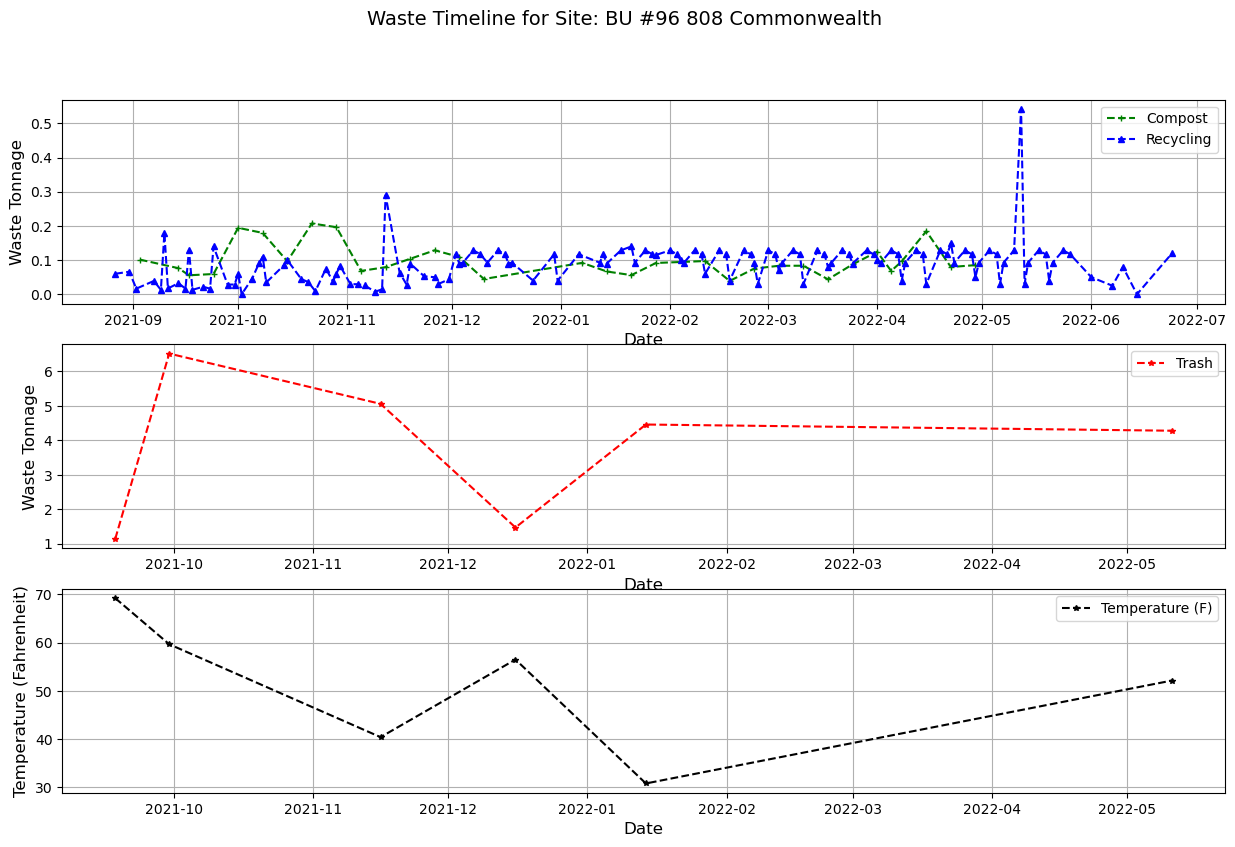

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.086791  0.603610
fahrenheit -0.086791    1.000000 -0.189889
valuePsi    0.603610   -0.189889  1.000000


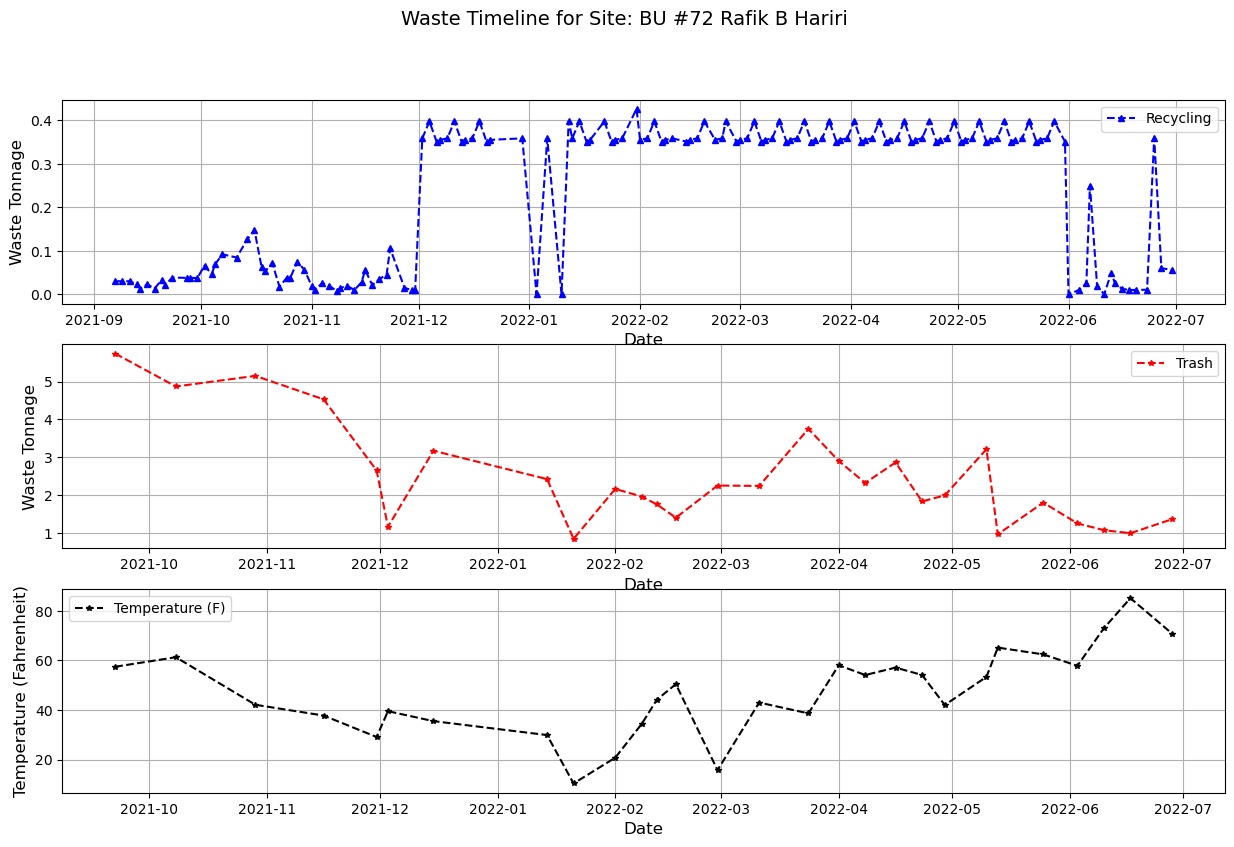

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.206512  0.733463
fahrenheit -0.206512    1.000000  0.016864
valuePsi    0.733463    0.016864  1.000000


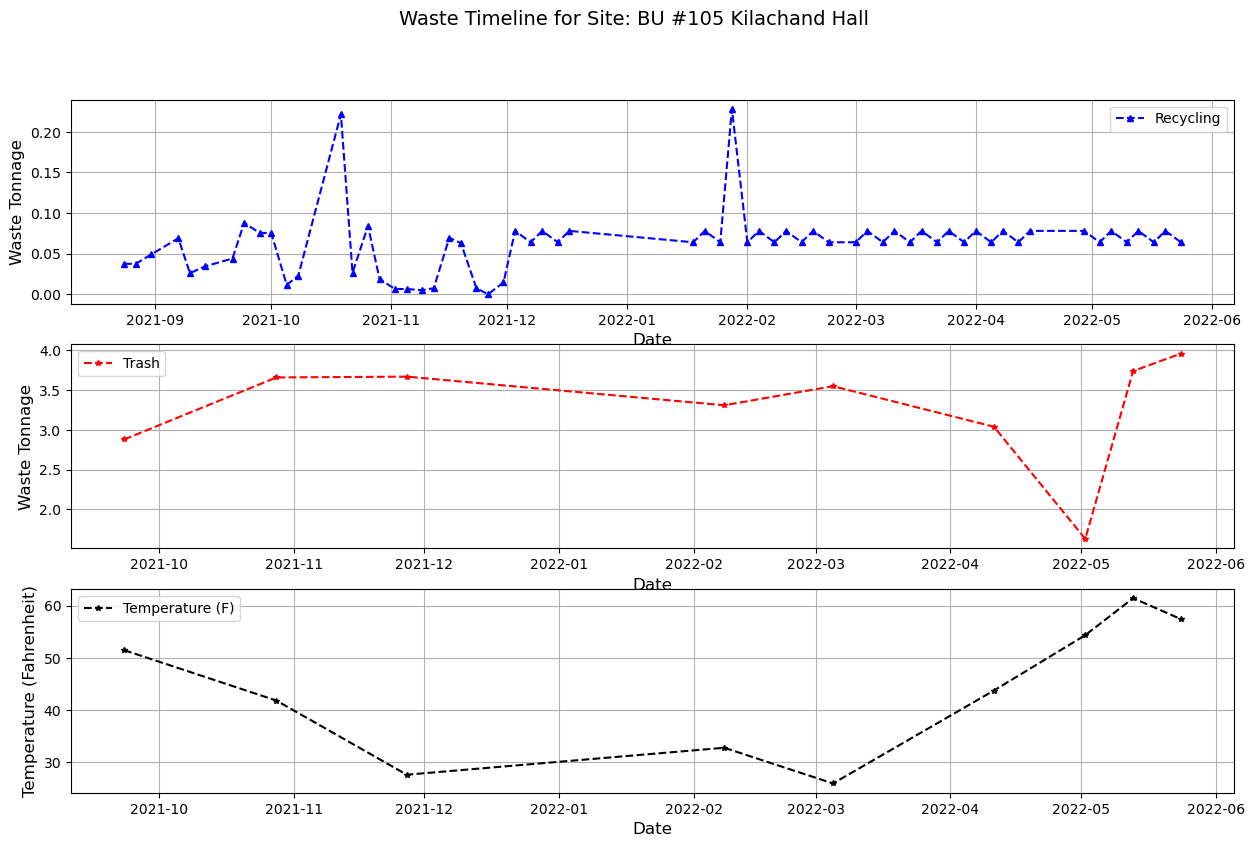

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.196702  0.250375
fahrenheit -0.196702    1.000000 -0.660191
valuePsi    0.250375   -0.660191  1.000000


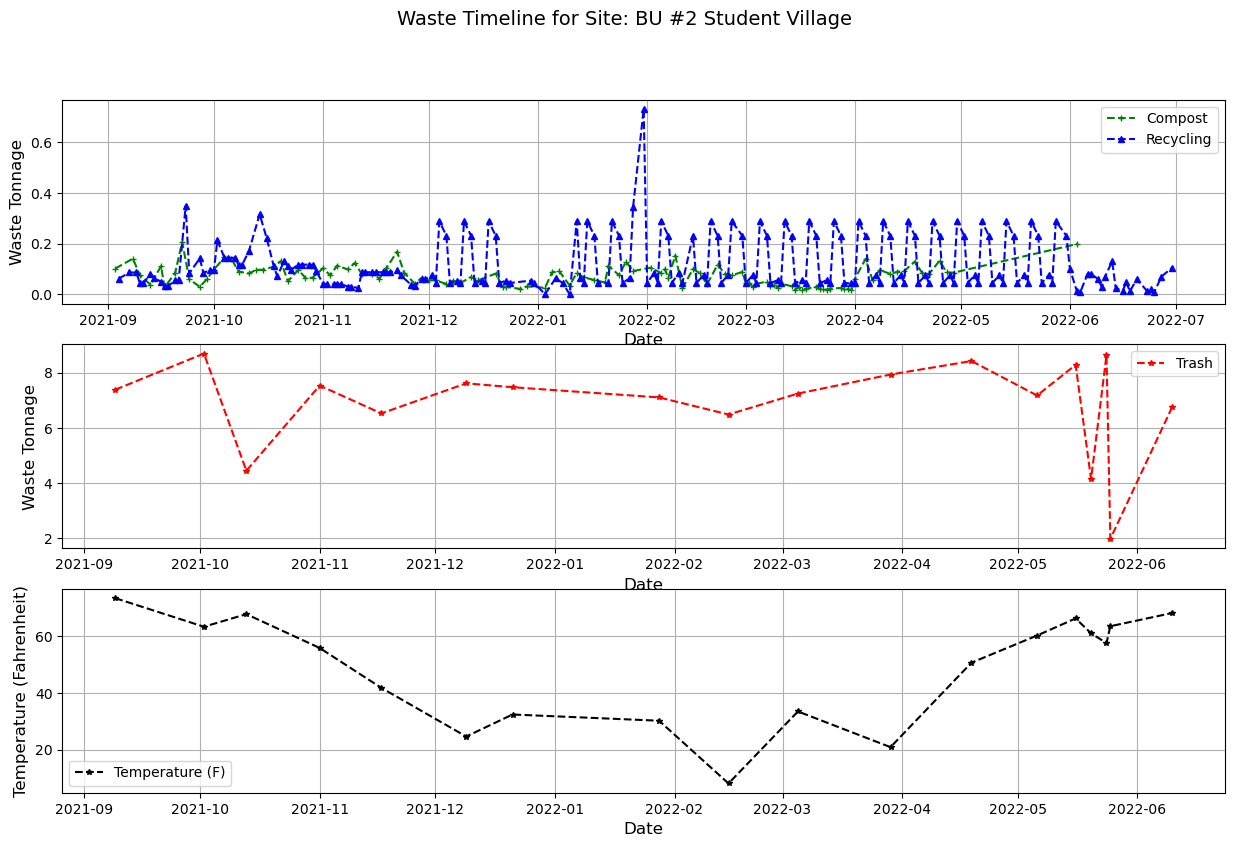

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.167476  0.704332
fahrenheit  0.167476    1.000000  0.210354
valuePsi    0.704332    0.210354  1.000000


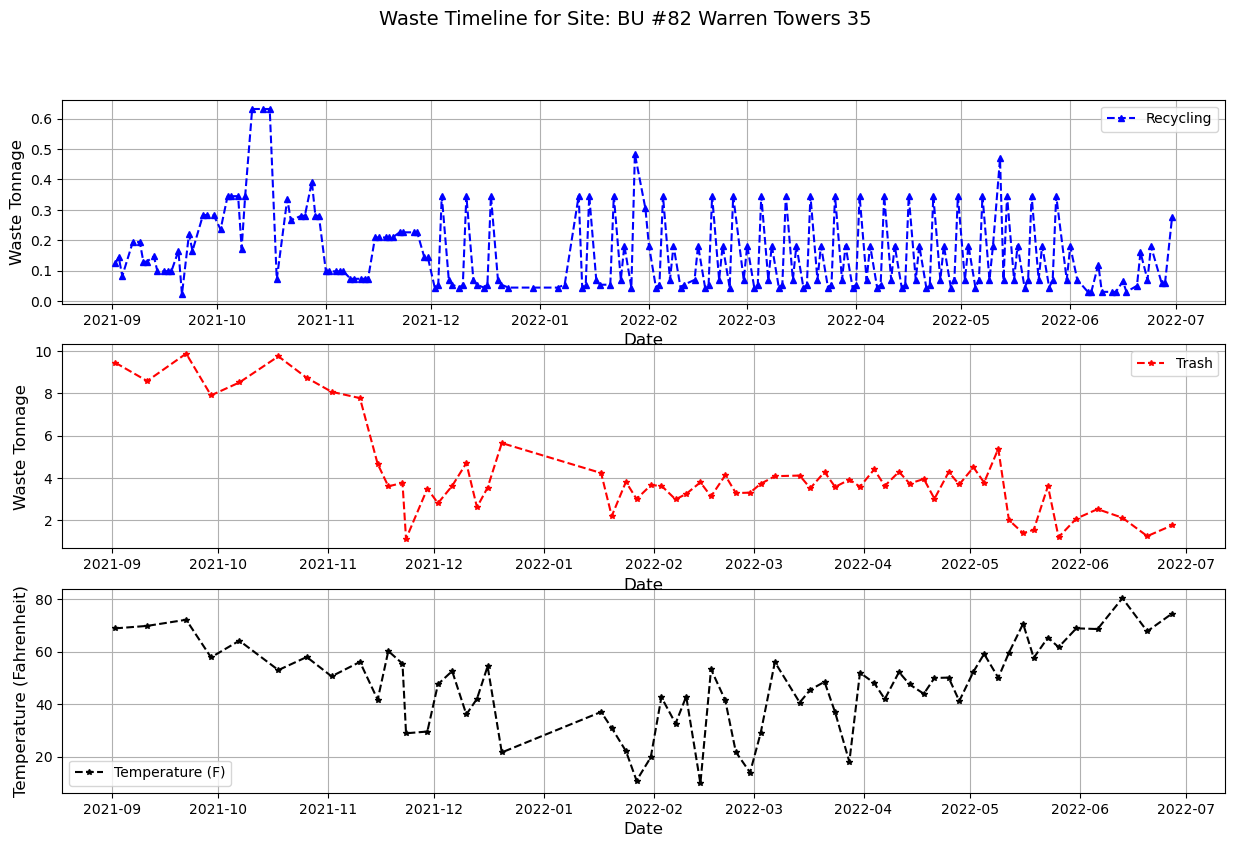

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.027914 -0.079820
fahrenheit -0.027914    1.000000 -0.179984
valuePsi   -0.079820   -0.179984  1.000000


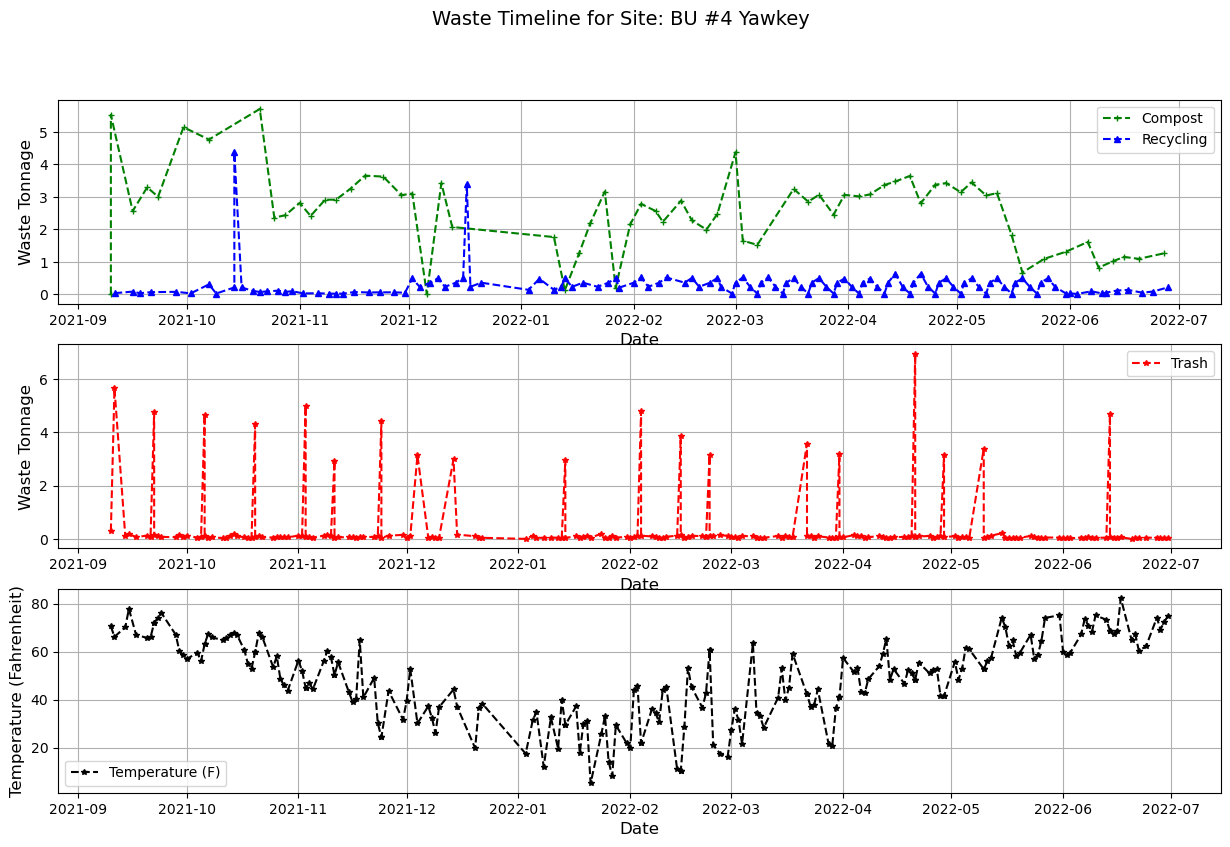

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.335785  0.249268
fahrenheit  0.335785    1.000000 -0.267374
valuePsi    0.249268   -0.267374  1.000000


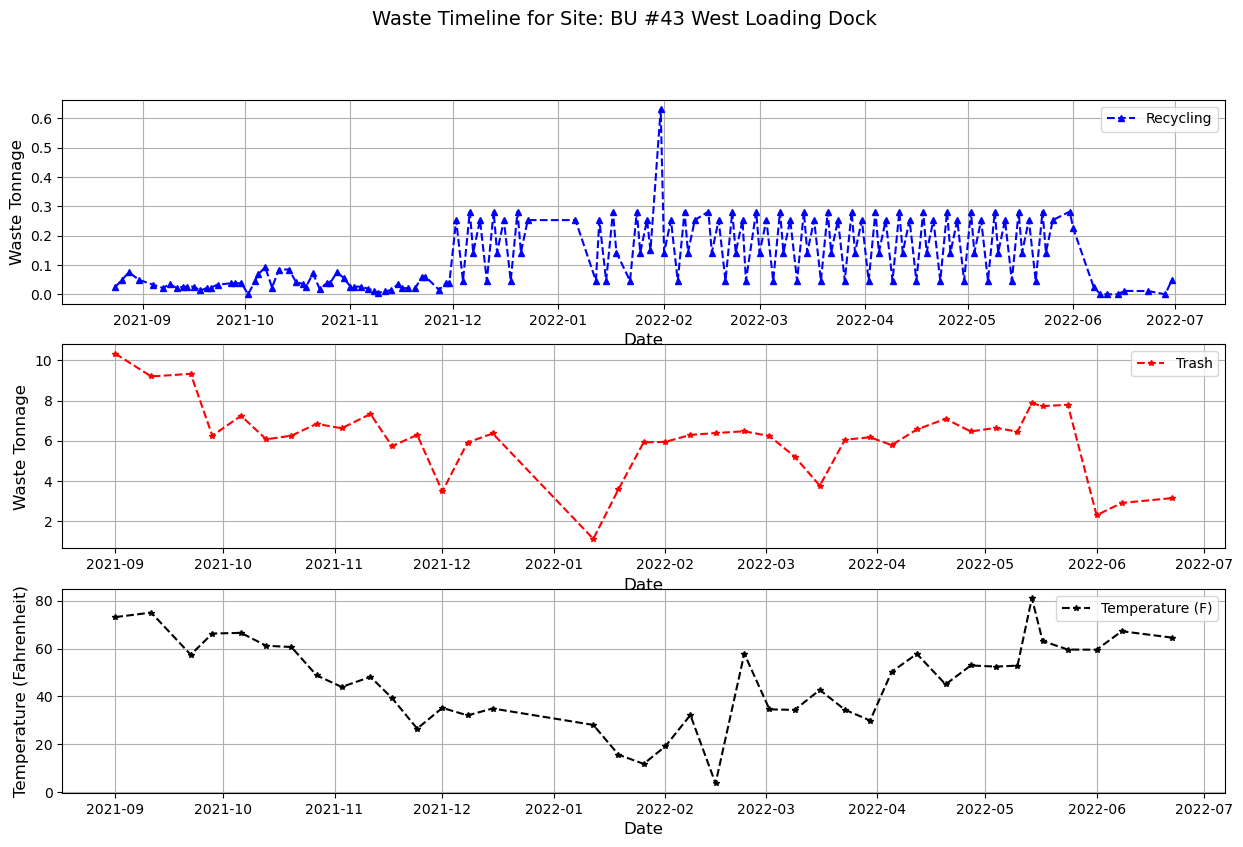

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.101029 -0.069528
fahrenheit  0.101029    1.000000 -0.552809
valuePsi   -0.069528   -0.552809  1.000000


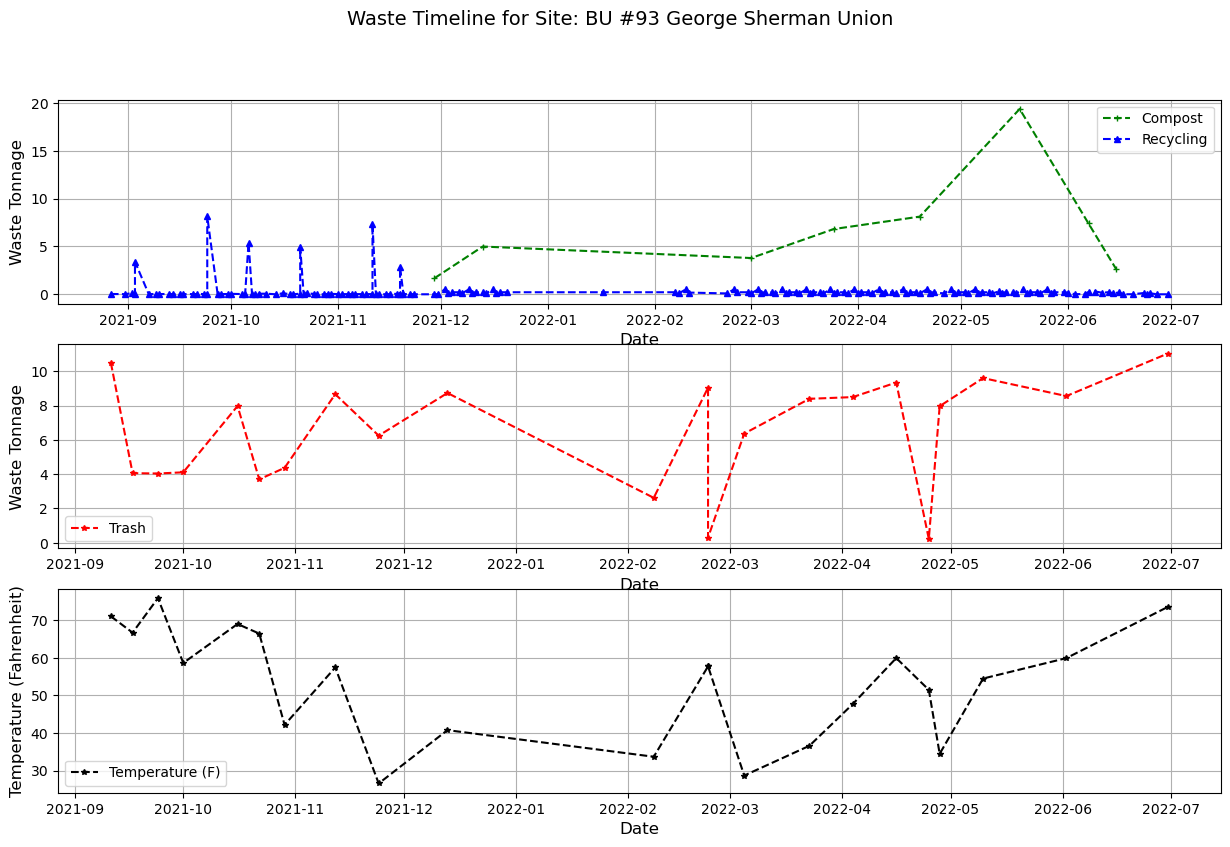

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.117690  0.359739
fahrenheit -0.117690    1.000000 -0.642383
valuePsi    0.359739   -0.642383  1.000000


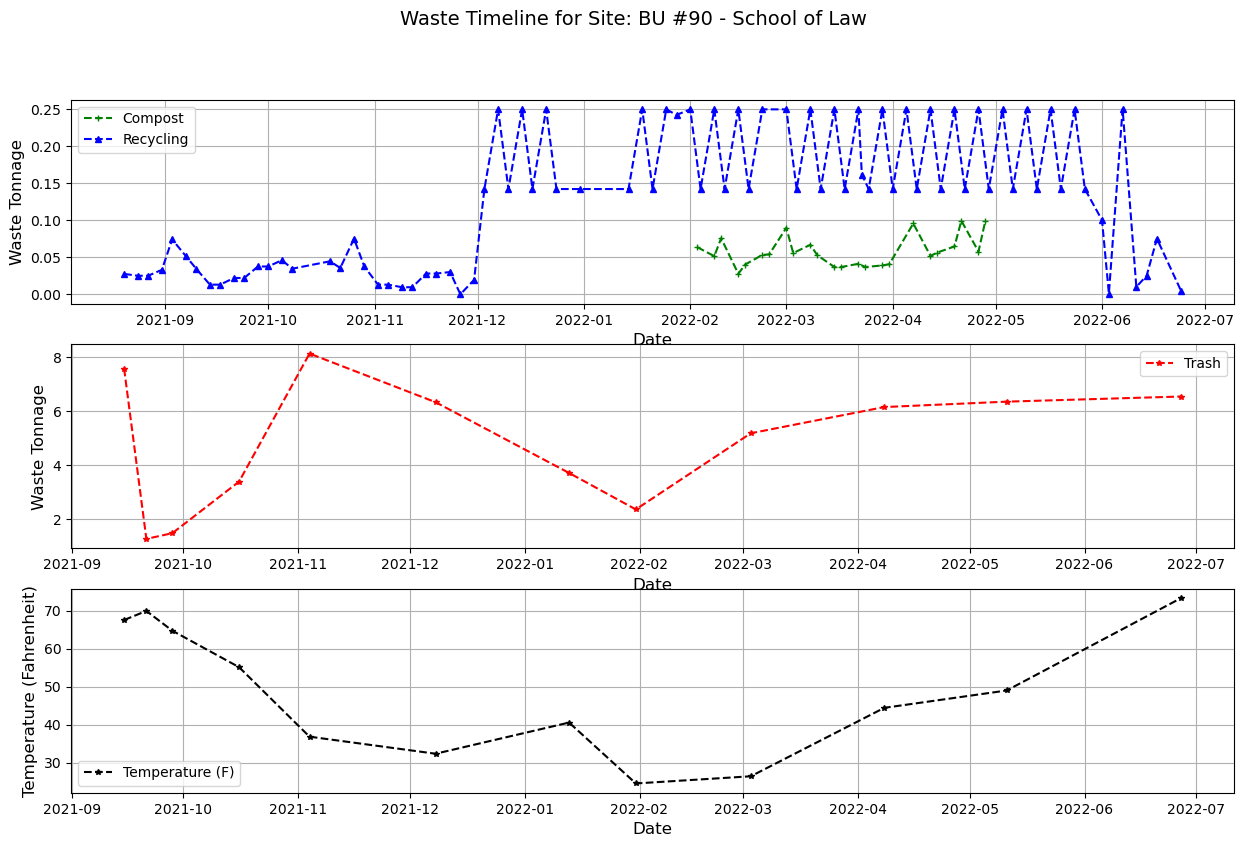

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.524403  0.631445
fahrenheit  0.524403    1.000000  0.401099
valuePsi    0.631445    0.401099  1.000000


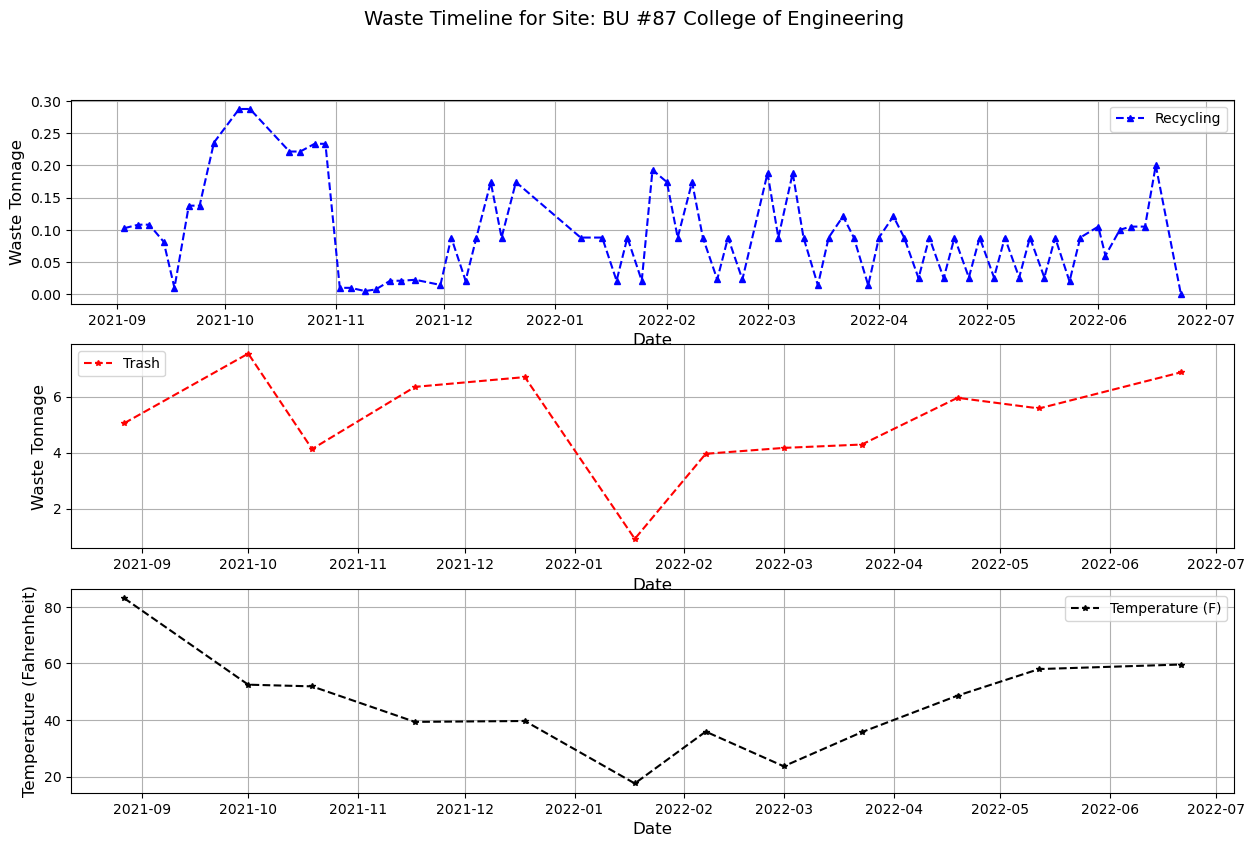

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.102884  0.579789
fahrenheit  0.102884    1.000000 -0.313997
valuePsi    0.579789   -0.313997  1.000000


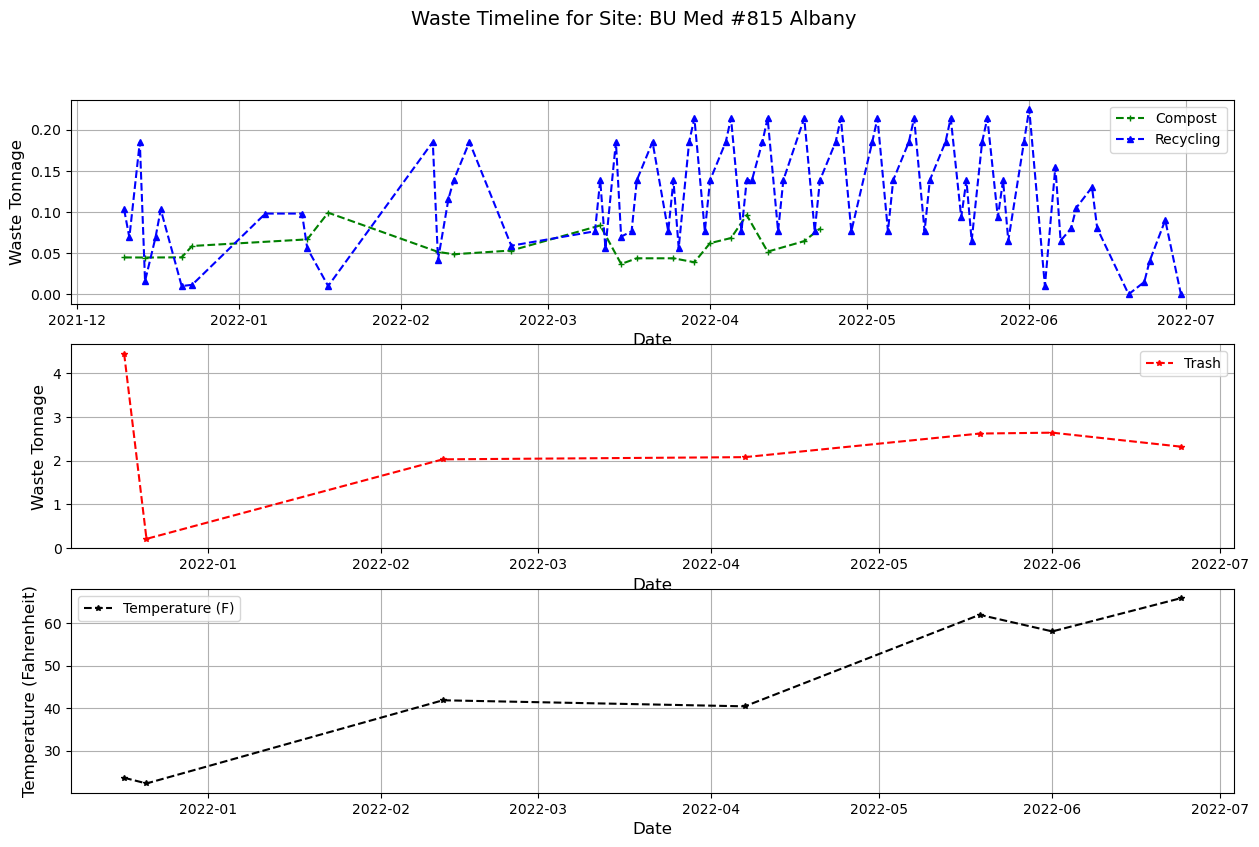

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.007691  0.100486
fahrenheit  0.007691    1.000000 -0.675139
valuePsi    0.100486   -0.675139  1.000000


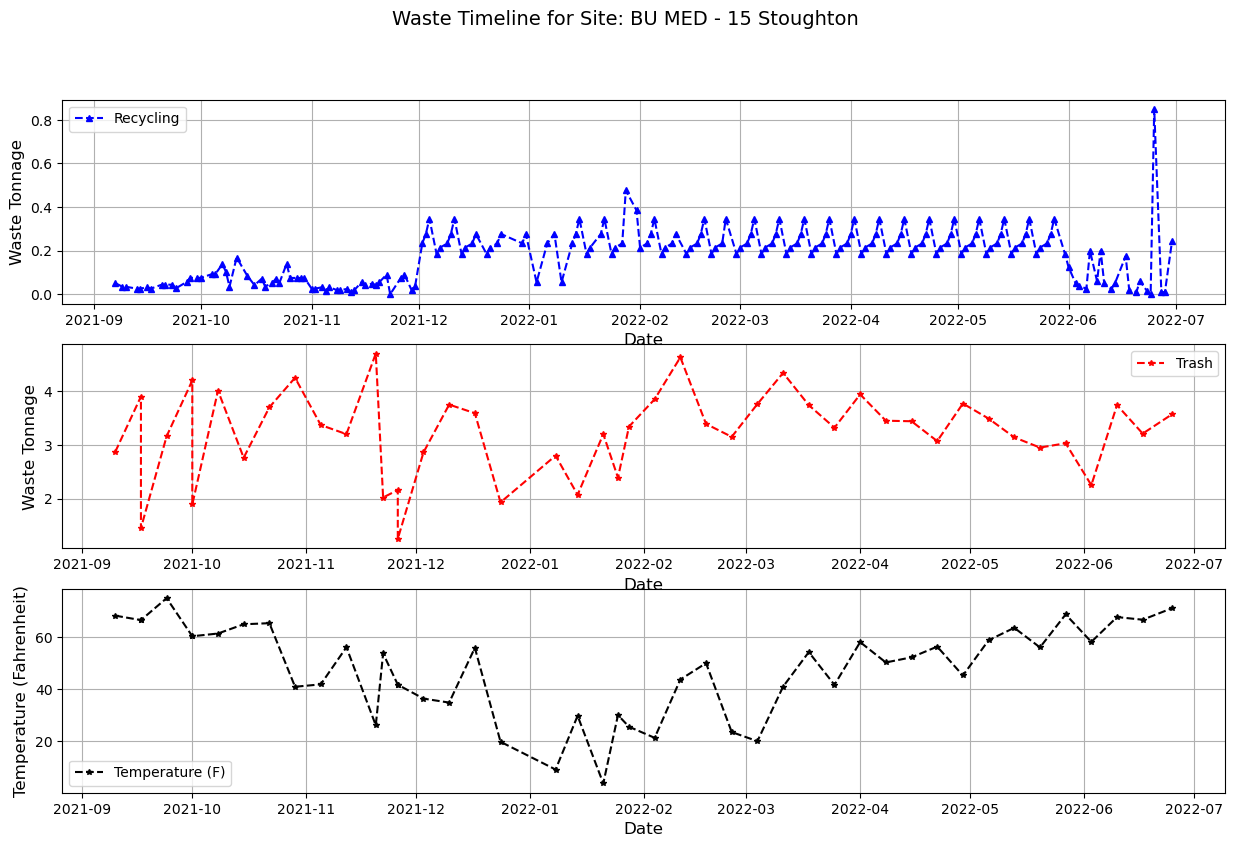

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.166739 -0.125750
fahrenheit -0.166739    1.000000 -0.555421
valuePsi   -0.125750   -0.555421  1.000000


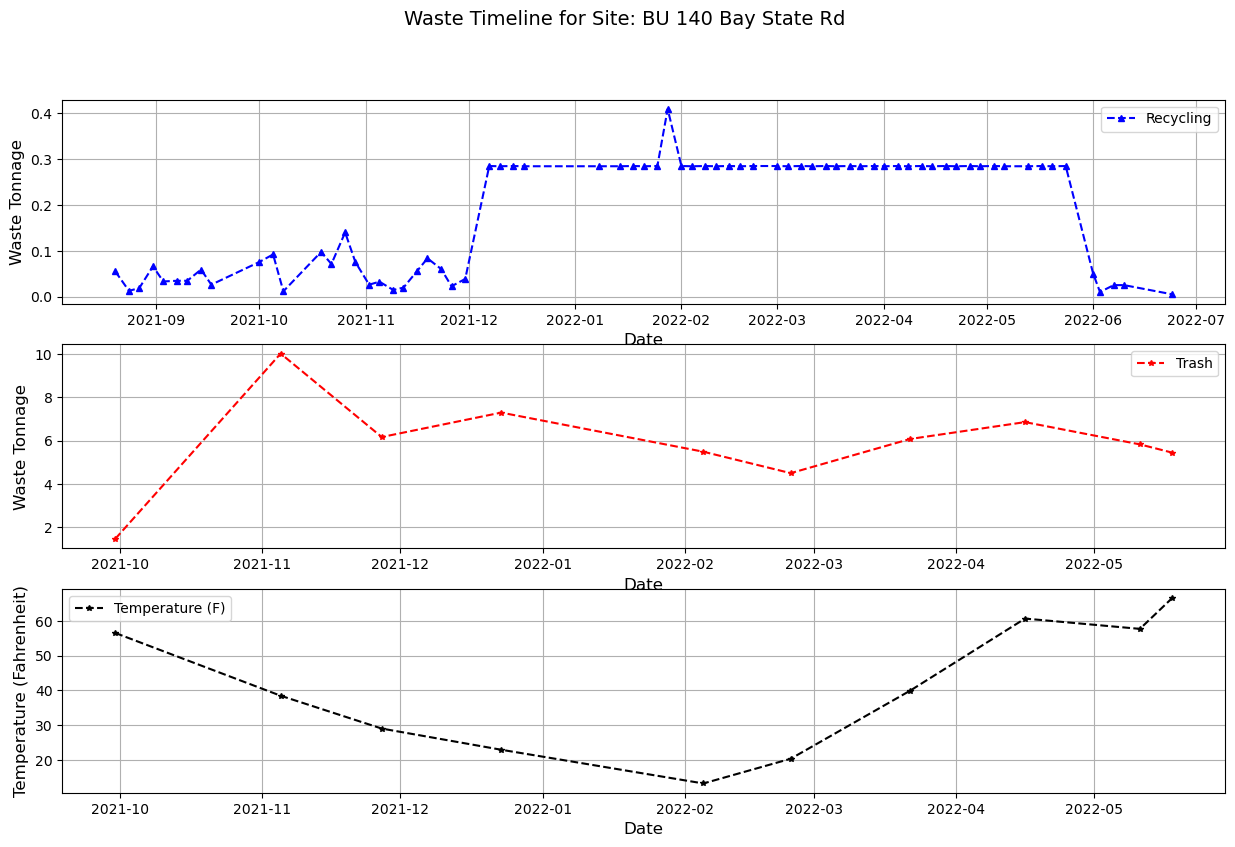

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.234492  0.452917
fahrenheit  0.234492    1.000000 -0.021777
valuePsi    0.452917   -0.021777  1.000000


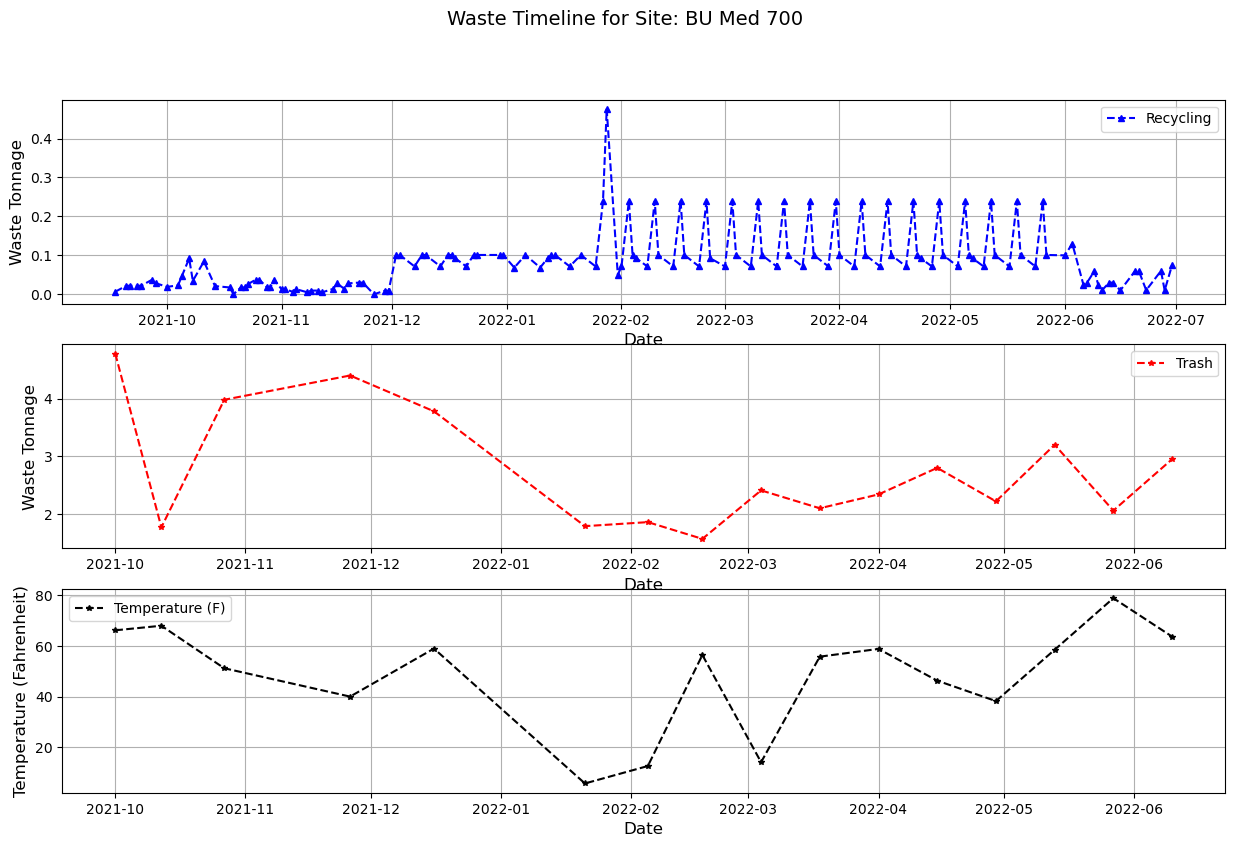

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000    0.281911  0.051490
fahrenheit  0.281911    1.000000  0.323182
valuePsi    0.051490    0.323182  1.000000


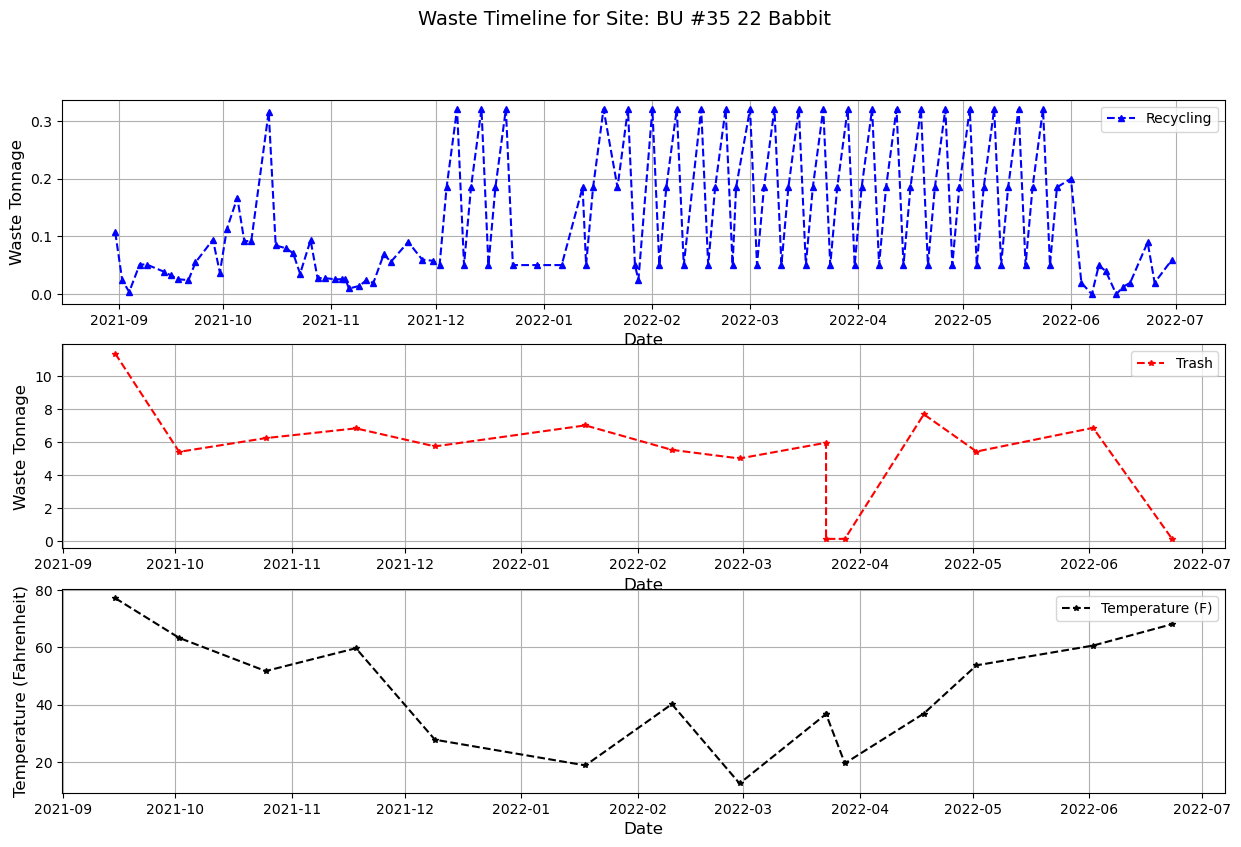

Pearson Correlations:
                 Tons  fahrenheit  valuePsi
Tons        1.000000   -0.343597  0.312510
fahrenheit -0.343597    1.000000 -0.238578
valuePsi    0.312510   -0.238578  1.000000


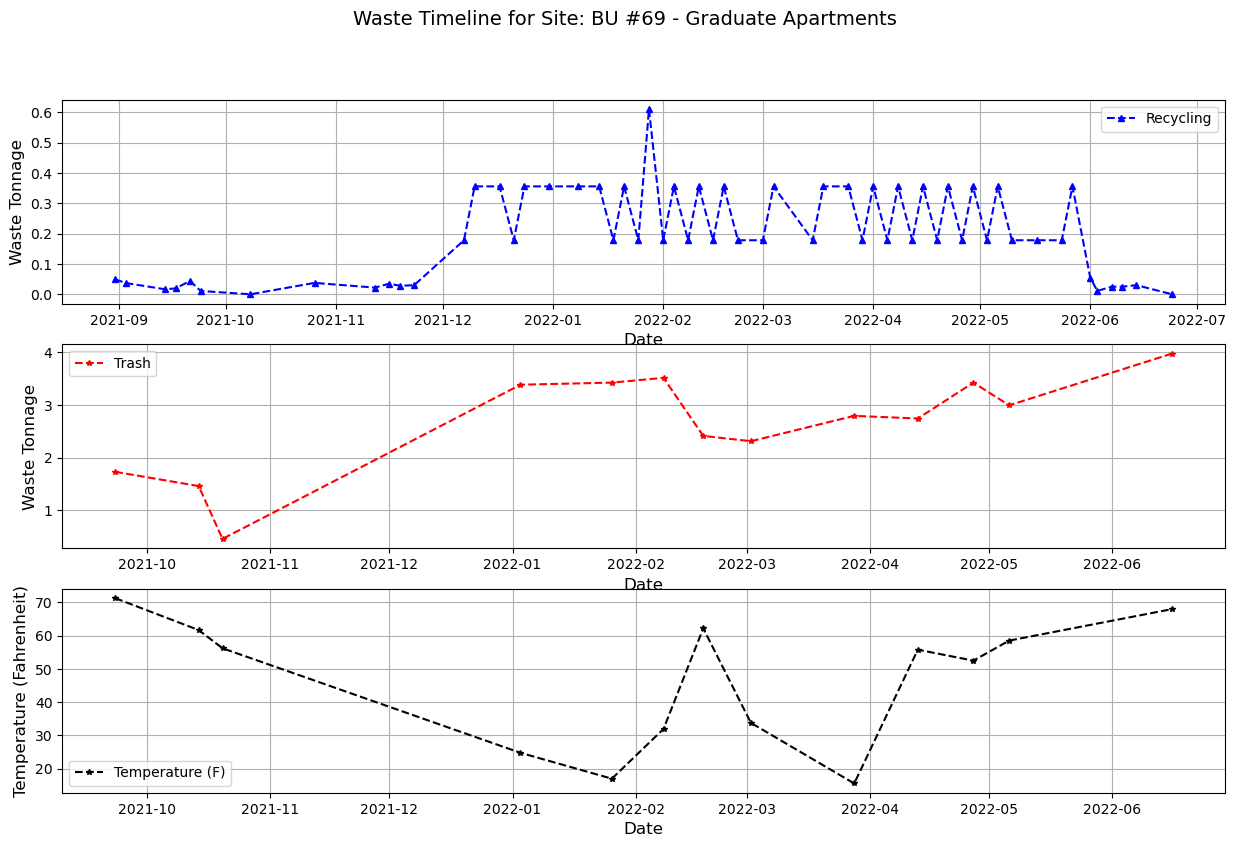

In [42]:
#Generate timeline plots for each site - Date vs. Tonnage
for siteName in device_readings_weights_df.site_name.unique():
    
    site_df = device_readings_weights_df[device_readings_weights_df['site_name'] == siteName]
    site_df_trash = site_df[site_df.Material == 'Trash']
    site_df_recycling = site_df[site_df.Material == 'Recycling']
    site_df_compost = site_df[site_df.Material == 'Compost']
    
    print("Pearson Correlations:\n", site_df_trash[['Tons', 'fahrenheit', 'valuePsi']].corr(method='pearson'))
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(15, 9))
    #fig = plt.figure(figsize=(15,4))
    fig.suptitle("Waste Timeline for Site: {}".format(siteName), fontsize=14)
    ax1.set_xlabel("Date", fontsize=12)
    ax1.set_ylabel("Waste Tonnage", fontsize=12)
    
    #plt.subplot(211)
    if(len(site_df_compost) > 0):
        ax1.plot(site_df_compost.date, site_df_compost.Tons, '+--', ms=4, color='green', label='Compost')
    if(len(site_df_recycling) > 0):
        ax1.plot(site_df_recycling.date, site_df_recycling.Tons, '^--', ms=4, color='blue', label='Recycling')
    
    #plt.subplot(212)
    if(len(site_df_trash) > 0):
        ax2.plot(site_df_trash.date, site_df_trash.Tons, '*--', ms=4, color='red', label='Trash')
    ax2.set_xlabel("Date", fontsize=12)
    ax2.set_ylabel("Waste Tonnage", fontsize=12)
    
    ax3.plot(site_df_trash.date, site_df_trash.fahrenheit, '*--', ms=4, color='black', label='Temperature (F)')
    ax3.set_xlabel("Date", fontsize=12)
    ax3.set_ylabel("Temperature (Fahrenheit)", fontsize=12)
    
    ax1.legend()
    ax2.legend()
    ax3.legend()

    ax1.grid()
    ax2.grid()
    ax3.grid()
    plt.show()

### Groupby material and site for detailed analysis

In [43]:
#Groupby material and site
material_site_grouped = device_readings_weights_df.groupby(['Material', 'site_name'])['Tons'].mean().reset_index()
material_site_grouped

,Material,site_name,Tons
0,Compost,BU #2 Student Village,0.072414
1,Compost,BU #4 Yawkey,2.559394
2,Compost,BU #90 - School of Law,0.057736
3,Compost,BU #93 George Sherman Union,6.852500
4,Compost,BU #96 808 Commonwealth,0.098577
5,Compost,BU Med #815 Albany,0.059057
6,Recycling,BU #102 Student Health Services,0.099266
7,Recycling,BU #105 Kilachand Hall,0.062690
8,Recycling,BU #2 Student Village,0.115574
9,Recycling,BU #35 22 Babbit,0.129483


#### Compost

<AxesSubplot: title={'center': 'Average Daily Compost by Site'}, xlabel='Site Name', ylabel='Average Daily Compost (Tons)'>

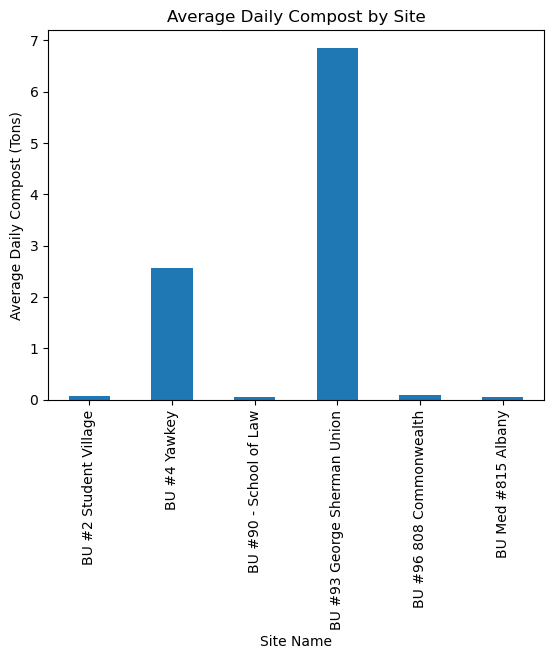

In [44]:
compost_data = material_site_grouped[material_site_grouped.Material == 'Compost']
compost_data.index = compost_data.site_name
compost_data['Tons'].plot(x=compost_data.site_name, xlabel='Site Name', ylabel='Average Daily Compost (Tons)',
                          title='Average Daily Compost by Site', kind='bar')

#### Recycling

<AxesSubplot: title={'center': 'Average Daily Recyling by Site'}, xlabel='Site Name', ylabel='Average Daily Recycling (Tons)'>

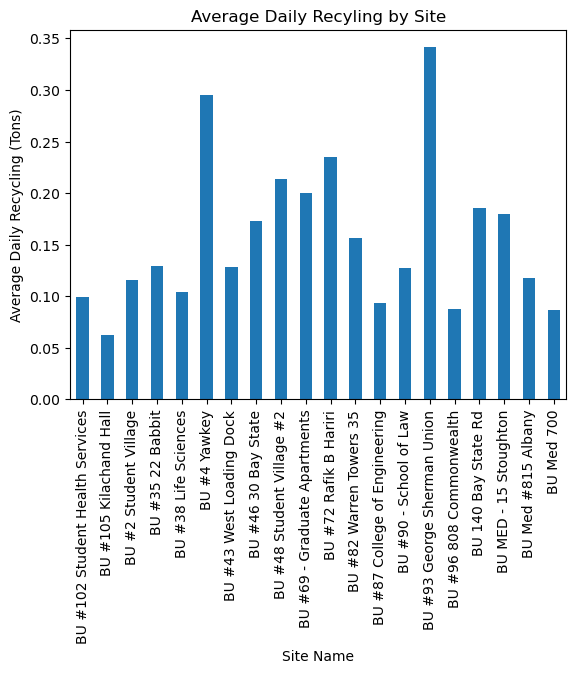

In [45]:
recy_data = material_site_grouped[material_site_grouped.Material == 'Recycling']
recy_data.index = recy_data.site_name
recy_data['Tons'].plot(x=recy_data.site_name, xlabel='Site Name', ylabel='Average Daily Recycling (Tons)',
                          title='Average Daily Recyling by Site', kind='bar')

#### Trash 

<AxesSubplot: title={'center': 'Average Daily Trash by Site'}, xlabel='Site Name', ylabel='Average Daily Trash (Tons)'>

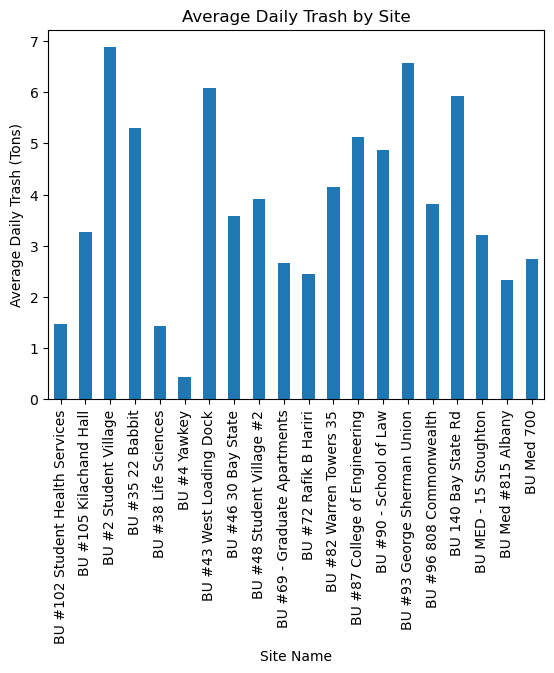

In [46]:
trash_data = material_site_grouped[material_site_grouped.Material == 'Trash']
trash_data.index = trash_data.site_name
trash_data['Tons'].plot(x=trash_data.site_name, xlabel='Site Name', ylabel='Average Daily Trash (Tons)',
                          title='Average Daily Trash by Site', kind='bar')

### Cluster locations based on PSI, Temperature and waste tonnage

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

#Subset columns for clustering
#Group by site and extract features
cluster_df = device_readings_weights_df.groupby(['site_name']).agg(maxTons=('Tons','max'), 
                                                      meanTons=('Tons','mean'),
                                                     meanTemp=('fahrenheit','mean'),
                                                     meanPressure=('valuePsi','mean')).reset_index()
cluster_df

,site_name,maxTons,meanTons,meanTemp,meanPressure
0,BU #102 Student Health Services,6.65,0.335593,50.570971,841.616024
1,BU #105 Kilachand Hall,3.96,0.463743,45.683797,724.374263
2,BU #2 Student Village,8.69,0.475171,46.438153,670.722943
3,BU #35 22 Babbit,11.35,0.717042,47.835129,765.475989
4,BU #38 Life Sciences,3.31,0.427209,48.171053,352.112528
5,BU #4 Yawkey,6.96,0.753375,48.295409,976.784575
6,BU #43 West Loading Dock,10.34,1.349195,47.461019,722.269792
7,BU #46 30 Bay State,5.44,0.778881,50.808162,743.353514
8,BU #48 Student Village #2,5.56,0.706328,48.838878,758.802560
9,BU #69 - Graduate Apartments,3.97,0.650254,48.701738,693.402760


In [48]:
X = cluster_df[['maxTons', 'meanTons']]#, 'meanTemp', 'meanPressure']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.20797011, 0.1015702 ],
       [0.04047323, 0.21515877],
       [0.33499377, 0.22528786],
       [0.50062267, 0.43967604],
       [0.        , 0.1827761 ],
       [0.22727273, 0.47188124],
       [0.4377335 , 1.        ],
       [0.13262765, 0.49448897],
       [0.14009963, 0.43017953],
       [0.04109589, 0.38047677],
       [0.1513076 , 0.31768637],
       [0.40971357, 0.81768462],
       [0.2633873 , 0.50976571],
       [0.29950187, 0.33134491],
       [1.        , 0.96570654],
       [0.19987547, 0.        ],
       [0.41843088, 0.59570656],
       [0.08655044, 0.48616625],
       [0.07098381, 0.02750123],
       [0.09153176, 0.12745591]])

### Generate Elbow plot for Kmeans clustering

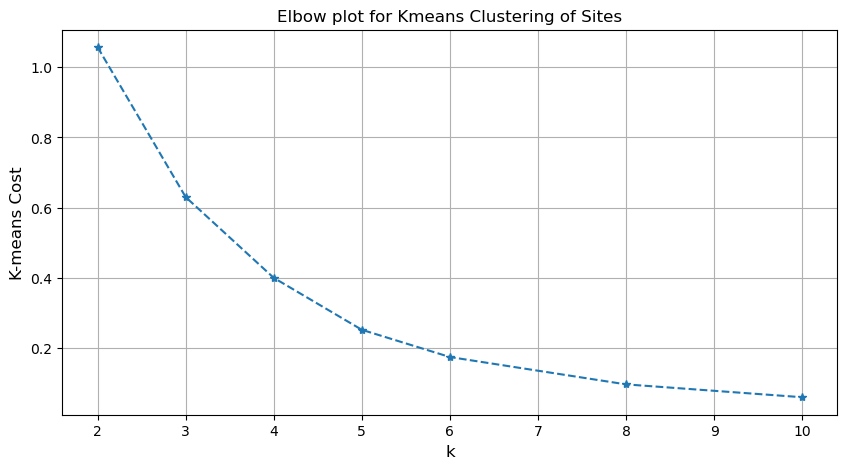

In [49]:
#Different K-values to try
k_vals = [2,3,4,5,6,8,10]
kmeans_cost = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=1234).fit(X)
    kmeans_cost.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(10,5))
plt.plot(k_vals, kmeans_cost, '*--')

plt.title("Elbow plot for Kmeans Clustering of Sites")
plt.xlabel("k", fontsize=12)
plt.ylabel("K-means Cost", fontsize=12)
plt.grid()

In [74]:
#Perform Clustering with optimal k and assign labels
#We use k=4 from elbow plot

kmeans_labels = KMeans(n_clusters=3, random_state=1234).fit_predict(X)
cluster_df['Cluster'] = kmeans_labels

In [75]:
cluster_df

,site_name,maxTons,meanTons,meanTemp,meanPressure,Cluster
0,BU #102 Student Health Services,6.65,0.335593,50.570971,841.616024,0
1,BU #105 Kilachand Hall,3.96,0.463743,45.683797,724.374263,0
2,BU #2 Student Village,8.69,0.475171,46.438153,670.722943,0
3,BU #35 22 Babbit,11.35,0.717042,47.835129,765.475989,2
4,BU #38 Life Sciences,3.31,0.427209,48.171053,352.112528,0
5,BU #4 Yawkey,6.96,0.753375,48.295409,976.784575,2
6,BU #43 West Loading Dock,10.34,1.349195,47.461019,722.269792,1
7,BU #46 30 Bay State,5.44,0.778881,50.808162,743.353514,2
8,BU #48 Student Village #2,5.56,0.706328,48.838878,758.802560,2
9,BU #69 - Graduate Apartments,3.97,0.650254,48.701738,693.402760,2


### Plot Heatmap using Folium

In [76]:
##Add Geolocation data for heatmap plotting
site_geolocations = pd.read_excel('data/Sites_Report.xlsx')
site_geolocations = site_geolocations[["Site Name", "GPS Latitude", "GPS Longitude"]]
site_geolocations

,Site Name,GPS Latitude,GPS Longitude
0,BU #102 Student Health Services,42.35,-71.11
1,BU #105 Kilachand Hall,42.35,-71.10
2,BU #108 Agganis Arena,42.35,-71.12
3,BU #18 - Warren Hall,42.35,-71.10
4,BU #2 Student Village,42.35,-71.12
5,BU #35 22 Babbit,42.35,-71.11
6,BU #38 Life Sciences,42.35,-71.10
7,BU #4 Yawkey,42.35,-71.10
8,BU #43 West Loading Dock,42.35,-71.12
9,BU #46 30 Bay State,42.35,-71.09


In [77]:
#Join geolocation data
cluster_df_geo = pd.merge(cluster_df, site_geolocations, how='left', left_on="site_name", right_on="Site Name")
cluster_df_geo.rename(columns={"GPS Latitude": "latitude", "GPS Longitude": "longitude"}, inplace=True)
cluster_df_geo

,site_name,maxTons,meanTons,meanTemp,meanPressure,Cluster,Site Name,latitude,longitude
0,BU #102 Student Health Services,6.65,0.335593,50.570971,841.616024,0,BU #102 Student Health Services,42.35,-71.11
1,BU #105 Kilachand Hall,3.96,0.463743,45.683797,724.374263,0,BU #105 Kilachand Hall,42.35,-71.10
2,BU #2 Student Village,8.69,0.475171,46.438153,670.722943,0,BU #2 Student Village,42.35,-71.12
3,BU #35 22 Babbit,11.35,0.717042,47.835129,765.475989,2,BU #35 22 Babbit,42.35,-71.11
4,BU #38 Life Sciences,3.31,0.427209,48.171053,352.112528,0,BU #38 Life Sciences,42.35,-71.10
5,BU #4 Yawkey,6.96,0.753375,48.295409,976.784575,2,BU #4 Yawkey,42.35,-71.10
6,BU #43 West Loading Dock,10.34,1.349195,47.461019,722.269792,1,BU #43 West Loading Dock,42.35,-71.12
7,BU #46 30 Bay State,5.44,0.778881,50.808162,743.353514,2,BU #46 30 Bay State,42.35,-71.09
8,BU #48 Student Village #2,5.56,0.706328,48.838878,758.802560,2,BU #48 Student Village #2,42.35,-71.12
9,BU #69 - Graduate Apartments,3.97,0.650254,48.701738,693.402760,2,BU #69 - Graduate Apartments,42.35,-71.10


In [95]:
from folium import plugins, Map, Marker, Icon, CircleMarker
from folium.plugins import HeatMap

# Define the map center for BU
map_center = [42.3601, -71.0589]

In [100]:
base_map = Map(location=map_center, zoom_start = 12)
mean = cluster_df_geo.groupby(['latitude', 'longitude'], as_index=False)['maxTons'].mean()

#Add heatmap
HeatMap(mean).add_to(base_map)

In [101]:
mean

,latitude,longitude,maxTons
0,42.32,-71.06,4.700000
1,42.33,-71.08,4.450000
2,42.34,-71.07,4.780000
3,42.35,-71.12,8.196667
4,42.35,-71.11,9.925000
5,42.35,-71.10,6.265714
6,42.35,-71.09,5.440000


In [102]:
base_map

In [80]:
# Create the base map
clusterMap = Map(location=map_center, zoom_start = 14)
plotColors = {0:'yellow', 1:'red', 2:'red', 3:'blue'}

for i, row in cluster_df_geo.iterrows():
    CircleMarker([row.latitude, row.longitude],
        radius=10,
        color=plotColors[row.Cluster]
        ).add_to(clusterMap)

In [81]:
#View clustermap
clusterMap

### Attempt to Incorporate PSI, wind speed and Site details
- Could not incorporate since PSI readings mostly exist only after May 2022

In [ ]:
### First join PSI, wind speed and site address by serial no
psi_weather = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
psi_weather

In [ ]:
#Create Date column
psi_weather['date'] = pd.to_datetime(psi_weather['Reading Date']).dt.date

In [ ]:
psi_weather = psi_weather[['Site', 'Serial No.', 'date', 'Pressure', 'Wind Speed']]
psi_weather.rename(columns={"Serial No.": "serial_no"}, inplace=True)

In [ ]:
psi_mean_df = psi_weather.groupby(['serial_no','date']).mean().reset_index()
psi_mean_df

In [ ]:
psi_weather.groupby(['serial_no'])['date'].min()

In [ ]:
psi_site_join = psi_weather[['serial_no', 'Site']].drop_duplicates().reset_index(drop=True)

In [ ]:
#join site back 
psi_mean_df = psi_mean_df.merge(psi_site_join, on='serial_no')
psi_mean_df.reset_index(inplace = True, drop=True)

In [ ]:
psi_mean_df

In [ ]:
### Join Readings with Site
device_readings_site_df = pd.merge(all_devices_mean_df, psi_site_join, on='serial_no')

In [ ]:
device_readings_site_df

In [ ]:
device_readings_site_df.Site.value_counts()

### Look at Alert Types

In [ ]:
alert_flag_df = pd.read_csv('data/Alert_Flag_History_2023-01-04_1029.csv')
alert_flag_df

In [ ]:
plt.figure(figsize=(6,4))
alert_flag_df['Alert Type'].value_counts().plot.bar()
plt.xlabel("Alert Type")
plt.ylabel("Number of alerts")
plt.title("Number of Alerts for each alert type")

### Investigate PSI Readings with Weather

In [ ]:
psi_weather = pd.read_csv('data/PSI_Readings_with_Weather_2023-01-04_1026.csv')
psi_weather

In [ ]:
psi_weather[psi_weather['Serial No.'] == '24572']

In [ ]:
psi_weather.columns

In [ ]:
psi_weather[['Device', 'Serial No.']].value_counts()

In [ ]:
psi_weather.describe()

In [ ]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Serial No.'])['Pressure'].mean().plot.bar()
plt.xlabel("Device Serial")
plt.ylabel("Atmospheric Pressure")
plt.title("Atmospheric Pressure for each Device")

In [ ]:
plt.figure(figsize=(6,4))
psi_weather.groupby(['Device'])['Reading'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Device PSI Reading")
plt.title("Mean PSI Reading for each Device")

In [ ]:
psi_weather.groupby(['Device'])['Wind Speed'].mean().plot.bar()
plt.xlabel("Device Name")
plt.ylabel("Wind Speed")
plt.title("Mean Wind Speed for each Device")

### Look at Device Compactions

In [ ]:
deviceCompaction_df = pd.read_csv('data/Device_Compaction_Frequency_2023-01-04_1019.csv')
deviceCompaction_df

In [ ]:
plt.figure(figsize=(6,4))
deviceCompaction_df.groupby(['Site'])['Total Compactions'].mean().plot.bar()
plt.xlabel("Site Name")
plt.ylabel("Number of Compactions")
plt.title("Compactions by Site")

### Look at Daily Weights

In [ ]:
daily_weights_df = pd.read_excel('data/BU Daily Weights FY22.xlsx')
daily_weights_df

In [ ]:
daily_weights_df['Customer Key'].unique()

In [ ]:
daily_weights_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type")

In [ ]:
daily_weights_df['Location'].value_counts()[0:20]

In [ ]:
warren_towers_df = daily_weights_df[daily_weights_df['Location'] == 'BU #82 - Warren Towers']
warren_towers_df

In [ ]:
warren_towers_df.groupby('Material')['Tons'].mean().plot.bar()
plt.xlabel("Waste Type")
plt.ylabel("Mean Daily Weight")
plt.title("Mean Daily Weight by Waste Type at Warren Towers")

### Join and Consolidate Datasets